# CHIDIMMA LILIAN ALEX-EGBOGU

**Capstone Project: Data Science in Restaurant
Analytics**

Introduction
The restaurant industry is highly competitive, with success depending on factors like customer satisfaction, operational efficiency, and strategic decision-making. Data science provides actionable insights to optimize these areas. In this project, I leveraged restaurant analytics to solve critical business challenges, such as improving customer retention, streamlining operations, and boosting profitability.

Objectives
1. To analyze restaurant data/trends by identifying patterns in dining preferences, peak hours, and customer demographics etc., to perform EDA.
2. To build predictive models which helps to forecast demand like predicting sales trends to manage inventory and staffing.
3. To derive actionable insights which will enhance operational efficiency.

Techniques & Tools
1. Exploratory Data Analysis (EDA): Used to visualize trends in sales and customer behavior (Python: Pandas, Matplotlib/Seaborn).
2. Machine Learning:
Clustering (K-Means): Segment customers based on spending habits.
Linear Regression: Predict daily/weekly sales.

Conclusion
By applying data science to restaurant analytics, we empower businesses to make data-driven decisions that enhance profitability, efficiency, and customer satisfaction. This project demonstrates the transformative potential of analytics in the food industry.

###WEEK 1: Data Exploration

DELIVERABLES
1. Dataset Overview: Explore dataset dimensions, Check
for missing values and Perform data type conversions as needed.

2. Target Variable: Analyze "Aggregate rating" distribution. Address any class imbalances.

3. Descriptive Analysis: Calculate statistics for numerical columns. Explore categorical variables. Identify top 5 cuisines and cities.


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load data
df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]



### **Explore dataset dimensions**








In [3]:
df.shape

(9551, 21)



*   OBSERVATION
The dataset has 9,551 rows and 21 columns originally



###  **Check for missing values**

In [4]:
df.isna().sum().sort_values(ascending=False)

Cuisines                9
Restaurant Name         0
Country Code            0
City                    0
Restaurant ID           0
Address                 0
Locality                0
Longitude               0
Locality Verbose        0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

Cuisines                0.094231
Restaurant Name         0.000000
Country Code            0.000000
City                    0.000000
Restaurant ID           0.000000
Address                 0.000000
Locality                0.000000
Longitude               0.000000
Locality Verbose        0.000000
Latitude                0.000000
Average Cost for two    0.000000
Currency                0.000000
Has Table booking       0.000000
Has Online delivery     0.000000
Is delivering now       0.000000
Switch to order menu    0.000000
Price range             0.000000
Aggregate rating        0.000000
Rating color            0.000000
Rating text             0.000000
Votes                   0.000000
dtype: float64

In [6]:
df.dropna(subset=['Cuisines'], inplace=True)

In [7]:
df['Cuisines'].isna().sum()

np.int64(0)



*   OBSERVATION: The column Cuisines contains 9 missing values. This implies that out of 9,551 rows, there are 9,542 extant rows. This is below 1%. I therefore dropped the rows with missing values.








### **Perform data type conversions as needed.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [9]:
#Convert to category
df['Country Code'] = df['Country Code'].astype('category')


In [10]:
#Confirm the changes
print(df.dtypes)


Restaurant ID              int64
Restaurant Name           object
Country Code            category
City                      object
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                  object
Average Cost for two       int64
Currency                  object
Has Table booking         object
Has Online delivery       object
Is delivering now         object
Switch to order menu      object
Price range                int64
Aggregate rating         float64
Rating color              object
Rating text               object
Votes                      int64
dtype: object


*OBSERVATION: Country code which is a numerical data is rightly saved as integer. However, in this data set country code is regarded as a norminal variable which repesent different groups(countries) rather than a true numerical data and is most likely to be used for grouping later on. I decided to convert from integer to category.

Drop Columns

In [11]:
df = df.drop(['Restaurant ID', 'Address', 'Locality', 'Switch to order menu'], axis=1)
df.head()

Restaurant Name Country Code              City  \
0        Le Petit Souffle          162       Makati City   
1        Izakaya Kikufuji          162       Makati City   
2  Heat - Edsa Shangri-La          162  Mandaluyong City   
3                    Ooma          162  Mandaluyong City   
4             Sambo Kojin          162  Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314  
1               4.5   Dark Green   Excellent    591  
2               4.4        Green   Very Good    270  
3               4.9   Dark Green   Excellent    365  
4               4.8   Dark Green   Excellent    229

*   OBSERVATION: I observed that the columns; address, locality and locality verbose have similar information, ie, they address the same concern of where the restarant is situated. I consider using the three of them as unnecessary so I decided to drop two address and locality and use one instead.

    I also dont think that the column Switch to order menu will be relevant in this analysis, or better still, I don't see its relevance yet.

### **"Aggregate rating" distribution**

In [12]:
#check for target variable
df['Aggregate rating']

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

In [13]:
#Check the statistics

df['Aggregate rating'].describe().T

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64



*   OBSERVATION:
1. The standard deviation (1.52) is quite large, indicating significant variability in user opinions.
2. A large chunk of ratings (25% - 75%) falls between 2.5 and 3.7. This concentration indicates that most users see the product or service as average but not exceptional.
3. The minimum rating is 0, showing some users gave the lowest possible score. This could signal critical issues for a segment of users, such as unmet expectations, poor usability, or even defective experiences.
4. With a maximum rating of 4.9 and median rating of 3.2, some users recognize the product or service's potential but improvements are likely needed to shift the average closer to the higher end of the scale.
*   INSIGHT:
1. It appears that most ratings cluster between 2.5 and 3.7, while outliers exist at both ends of the scale. I will visualize to confirm



Aggregate rating 
 Skew = -0.9530521389484676


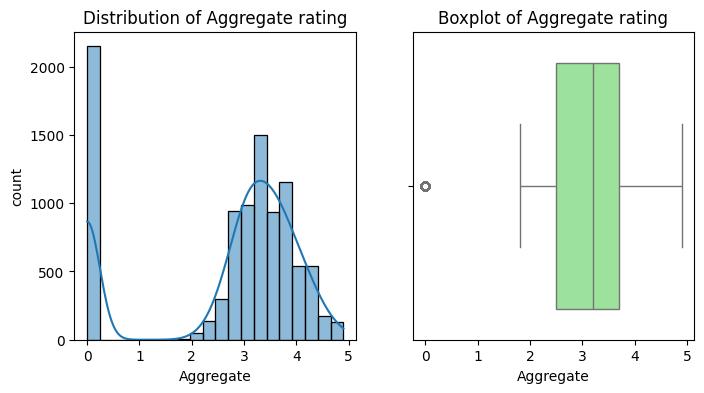

In [14]:
    skewness = df['Aggregate rating'].skew()
    print(f'Aggregate rating \n Skew = {skewness}')

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Aggregate rating'], kde=True, bins=20)
    plt.title('Distribution of Aggregate rating')
    plt.xlabel('Aggregate')
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['Aggregate rating'], color= 'lightgreen')
    plt.title('Boxplot of Aggregate rating')
    plt.xlabel('Aggregate')
    plt.show()
    plt.show()



*   OBSERVATIONS:
1. The histogram shows a right-skewed distribution, with a concentration of ratings at the lower end and a smaller cluster toward the upper end.
2. The boxplot provides a clear view of the spread. The majority of ratings fall within the interquartile range (between approximately 5 and 15), with a median around 10.
Whiskers extending to around 0 and 25 indicate potential outliers, showing occasional extremely low or high ratings.
3. The skewness value of -0.208 suggests a slight negative skew (left-leaning), indicating that ratings are distributed somewhat more heavily on the higher end within this dataset.
4. The presence of outliers and the broad range of ratings reflect polarized experiences among users. Some users may have had excellent encounters, while others faced significant dissatisfaction.

*   INSIGHTS:
1. Addressing the concerns of this dissatisfied group could significantly reduce the skewness and improve the overall mean rating.



In [15]:
#Perform transformation(log transformation)

df["log_Aggregate rating"] = np.log(df["Aggregate rating"] + 1)


Text(0, 0.5, 'count')

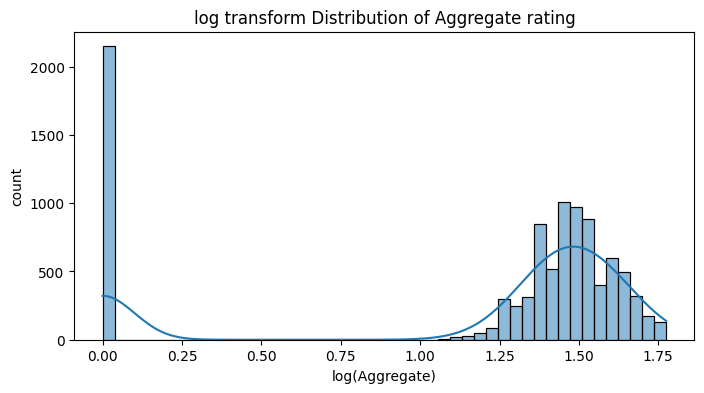

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df['log_Aggregate rating'], kde=True, bins=47)
plt.title('log transform Distribution of Aggregate rating')
plt.xlabel('log(Aggregate)')
plt.ylabel("count")

In [17]:
#perform transformation(square root transformation)

df["sqrt_Aggregate rating"] = np.sqrt(df["Aggregate rating"])


Text(0, 0.5, 'count')

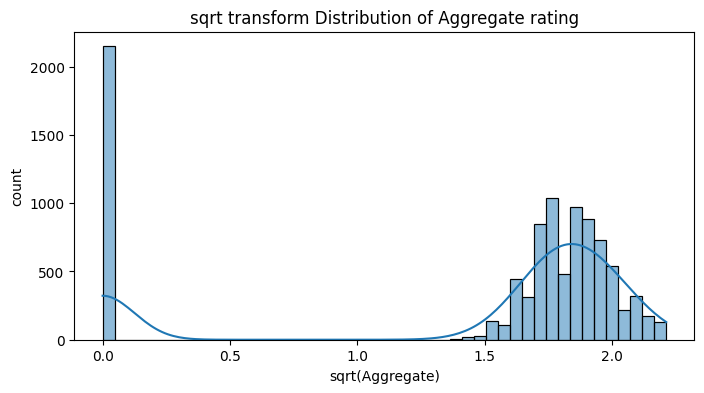

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(df['sqrt_Aggregate rating'], kde=True, bins=47)
plt.title('sqrt transform Distribution of Aggregate rating')
plt.xlabel('sqrt(Aggregate)')
plt.ylabel("count")



*   OBSERVATION: These Transformations were geared toward resolving the skewness but they all failed.  



### **Calculate statistics for numerical columns.**





In [19]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Longitude', 'Latitude', 'Average Cost for two', 'Price range',
       'Aggregate rating', 'Votes', 'log_Aggregate rating',
       'sqrt_Aggregate rating'],
      dtype='object')

In [20]:
df = df.drop(['log_Aggregate rating', 'sqrt_Aggregate rating'], axis=1)

In [21]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Longitude', 'Latitude', 'Average Cost for two', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

In [22]:
df.describe().T



count         mean           std         min  \
Longitude             9542.0    64.274997     41.197602 -157.948486   
Latitude              9542.0    25.848532     11.010094  -41.330428   
Average Cost for two  9542.0  1200.326137  16128.743876    0.000000   
Price range           9542.0     1.804968      0.905563    1.000000   
Aggregate rating      9542.0     2.665238      1.516588    0.000000   
Votes                 9542.0   156.772060    430.203324    0.000000   

                             25%         50%         75%            max  
Longitude              77.081565   77.192031   77.282043     174.832089  
Latitude               28.478658   28.570444   28.642711      55.976980  
Average Cost for two  250.000000  400.000000  700.000000  800000.000000  
Price range             1.000000    2.000000    2.000000       4.000000  
Aggregate rating        2.500000    3.200000    3.700000       4.900000  
Votes                   5.000000   31.000000  130.000000   10934.000000

### **Explore categorical variables**

In [23]:
cat_cols = df.select_dtypes(['object', 'category']).columns
cat_cols

Index(['Restaurant Name', 'Country Code', 'City', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Rating color', 'Rating text'],
      dtype='object')

In [24]:
categorical = df[['Restaurant Name', 'Country Code', 'City',
                 'Locality Verbose','Cuisines', 'Currency', 'Has Table booking',
                 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text'
]].value_counts()

categorical

Restaurant Name     Country Code  City       Locality Verbose                       Cuisines                             Currency            Has Table booking  Has Online delivery  Is delivering now  Rating color  Rating text
Cafe Coffee Day     1             New Delhi  Delhi University-GTB Nagar, New Delhi  Cafe                                 Indian Rupees(Rs.)  No                 No                   No                 Orange        Average        2
Pandey Chinese Hut  1             New Delhi  Pitampura, New Delhi                   Chinese, Fast Food                   Indian Rupees(Rs.)  No                 Yes                  No                 Orange        Average        2
Costa Coffee        1             Gurgaon    Sector 39, Gurgaon                     Cafe                                 Indian Rupees(Rs.)  No                 No                   No                 White         Not rated      2
Sandoz              1             New Delhi  Karol Bagh, New Delhi                  North Indian, Chinese                Indian Rupees(Rs.)  No                 No                   No                 Orange        Average        2
Cafe Coffee Day     1             Gurgaon    DLF Phase 3, Gurgaon                   Cafe                                 Indian Rupees(Rs.)  No                 No                   No                 Orange        Average        2
                                                                                                                                                                                                                                    ..
Food Cabana         1             Noida      Sector 72, Noida                       Chinese                              Indian Rupees(Rs.)  No                 No                   No                 White         Not rated      1
Food Cafe           1             New Delhi  Alaknanda, New Delhi                   South Indian, North Indian, Chinese  Indian Rupees(Rs.)  No                 No                   No                 White         Not rated      1
Food Campus         1             New Delhi  Mukherjee Nagar, New Delhi             North Indian                         Indian Rupees(Rs.)  No                 No                   No                 White         Not rated      1
Food Care           1             New Delhi  Shakarpur, New Delhi                   Chinese, Fast Food                   Indian Rupees(Rs.)  No                 No                   No                 White         Not rated      1
Food Adda           1             New Delhi  GTB Nagar, New Delhi                   North Indian, Italian, Chinese       Indian Rupees(Rs.)  No                 No                   No                 White         Not rated      1
Name: count, Length: 9512, dtype: int64

### **Identify top 5 cuisines and cities.bold text**

In [25]:
Top_5_Cuisines = df['Cuisines'].value_counts().head(5)

In [26]:
Top_5_Cuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [27]:
Top_5_Cities = df['City'].value_counts().head(5)
Top_5_Cities

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64



*   OBSERVATION:
1. North Indian Cuisine tops the chart with a 936 count while New Delhi tops the chart as the top city with 5473.
2. New Dehli topping the chart with that wide margin is not shocking as 3 amongs the top 5 cuisines are North Indian related.




## WEEK 2: Data Visualization

DELIVERABLES
Visualizations: Create histograms,bar plots, and boxplots of ratings.
                Compare average ratings across cuisines and cities.
Geospatial Analysis: Map restaurant locations using coordinates.Analyze
                distribution across cities. Correlate location with ratings.
Additional Analysis: Identify outliers and their effects. Determine
                relationship between votes and ratings.

### **Visualizations: Create histograms,bar plots, and boxplots of ratings.**       

Longitude 
 Skew = -2.8198281722867344


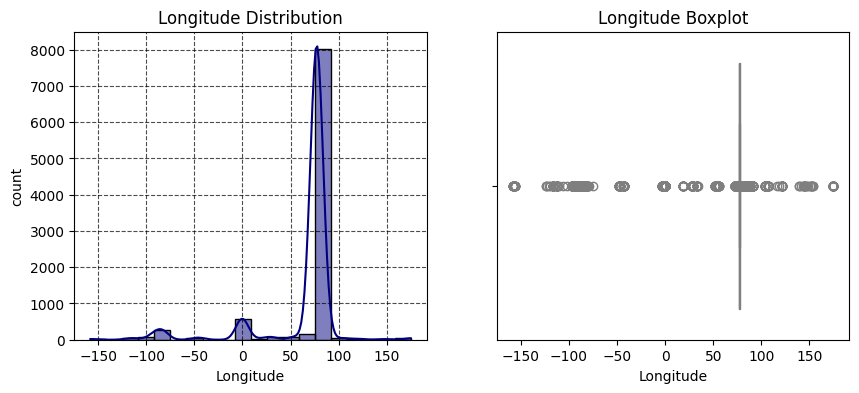

Latitude 
 Skew = -3.08177992019879


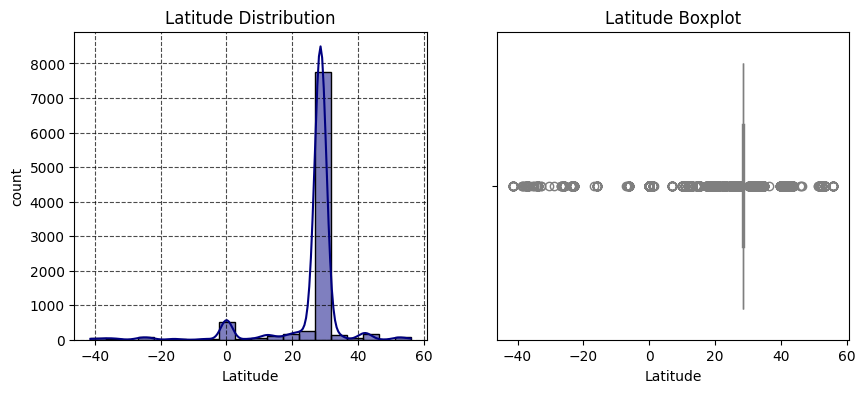

Average Cost for two 
 Skew = 35.4612635279866


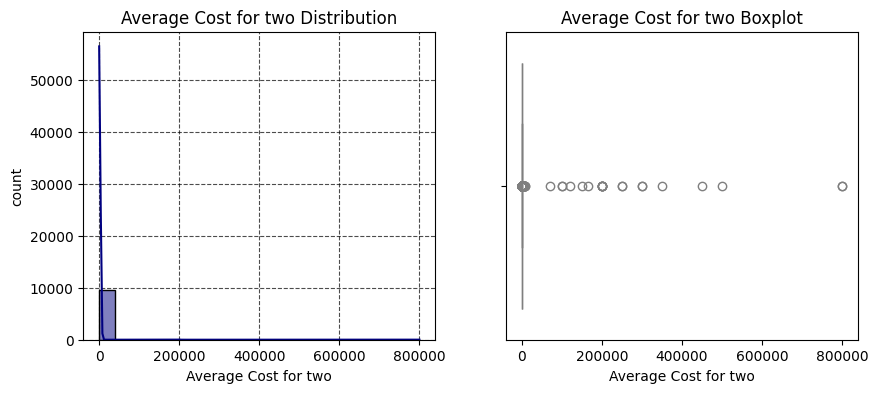

Price range 
 Skew = 0.8898787034079543


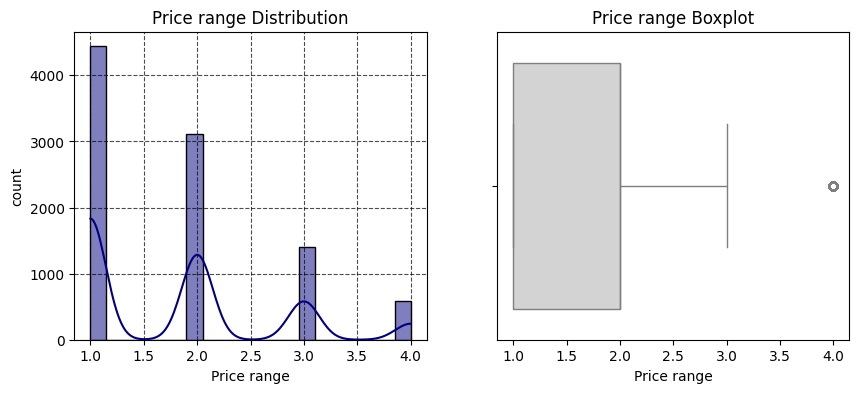

Aggregate rating 
 Skew = -0.9530521389484676


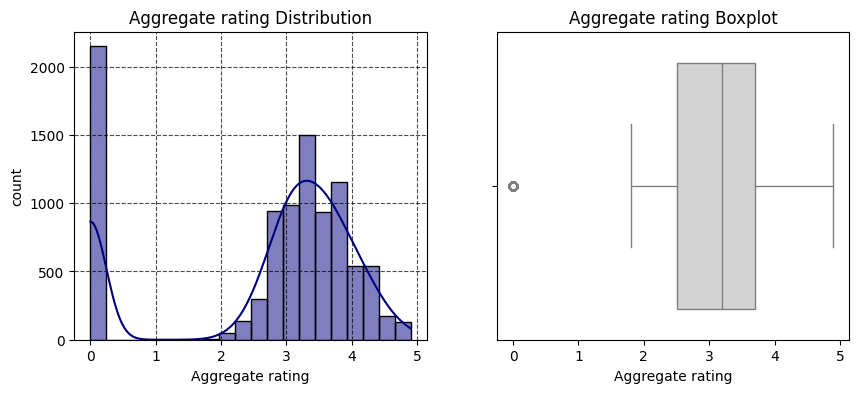

Votes 
 Skew = 8.813270097203294


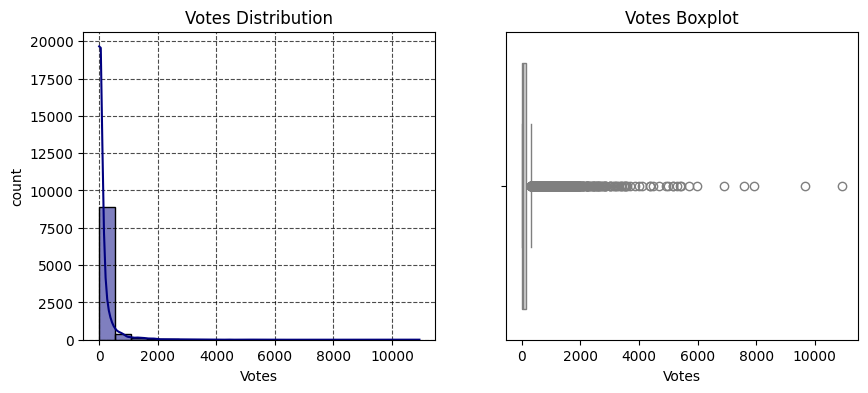

In [28]:
# loop through numerical columns
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='navy')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("count")
    plt.grid(linestyle='--', alpha=0.7, color='black')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color= 'lightgray')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)
    plt.show()
    plt.show()

###  **Compare average ratings across cuisines and cities.**



In [29]:
# Group by 'Cuisines' and 'City' and calculate the mean of 'Aggregate rating'
average_ratings = df.groupby(['Cuisines', 'City'])['Aggregate rating'].mean().reset_index()

# Sort values for easier comparison
average_ratings = average_ratings.sort_values(by='Aggregate rating', ascending=False)

average_ratings


Cuisines              City  Aggregate rating
36                American, BBQ, Sandwich           Orlando               4.9
1698                        Italian, Deli         Tampa Bay               4.9
1201                             Desserts          Auckland               4.9
1666         Italian, Bakery, Continental            Jaipur               4.9
1816                      Japanese, Sushi  Mandaluyong City               4.9
...                                   ...               ...               ...
2               Afghani, Mughlai, Chinese         New Delhi               0.0
3                   Afghani, North Indian           Gurgaon               0.0
3003       Tibetan, Chinese, North Indian         New Delhi               0.0
0                                 Afghani           Gurgaon               0.0
3007  Tibetan, South Indian, North Indian         New Delhi               0.0

[3024 rows x 3 columns]

*OBSERVATION:
1. Restaurants with the highest aggregate rating (4.9) are present in locations like: Rest of Hawaii (Hawaiian, Seafood), Inner City (European, Contemporary), Jaipur (Italian, Bakery, Continental),Jakarta (Sushi, Japanese), Orlando (American, BBQ, Sandwich)
2. Several entries have an aggregate rating of 0.0 in cities such as: Gurgaon (North Indian, Rajasthani), Noida (Fast Food, Street Food), Faridabad (North Indian, Seafood), New Delhi (North Indian, Rajasthani, Gujarati)
3. High aggregate ratings (4.9) seem associated with cuisines like Seafood, Sushi, and Continental, whereas low ratings (0.0) are tied to locations with North Indian cuisine.This may warrant a deeper look into why certain cities or cuisines have extreme ratings.This could be from lack of interest in rating or dissatisfaction

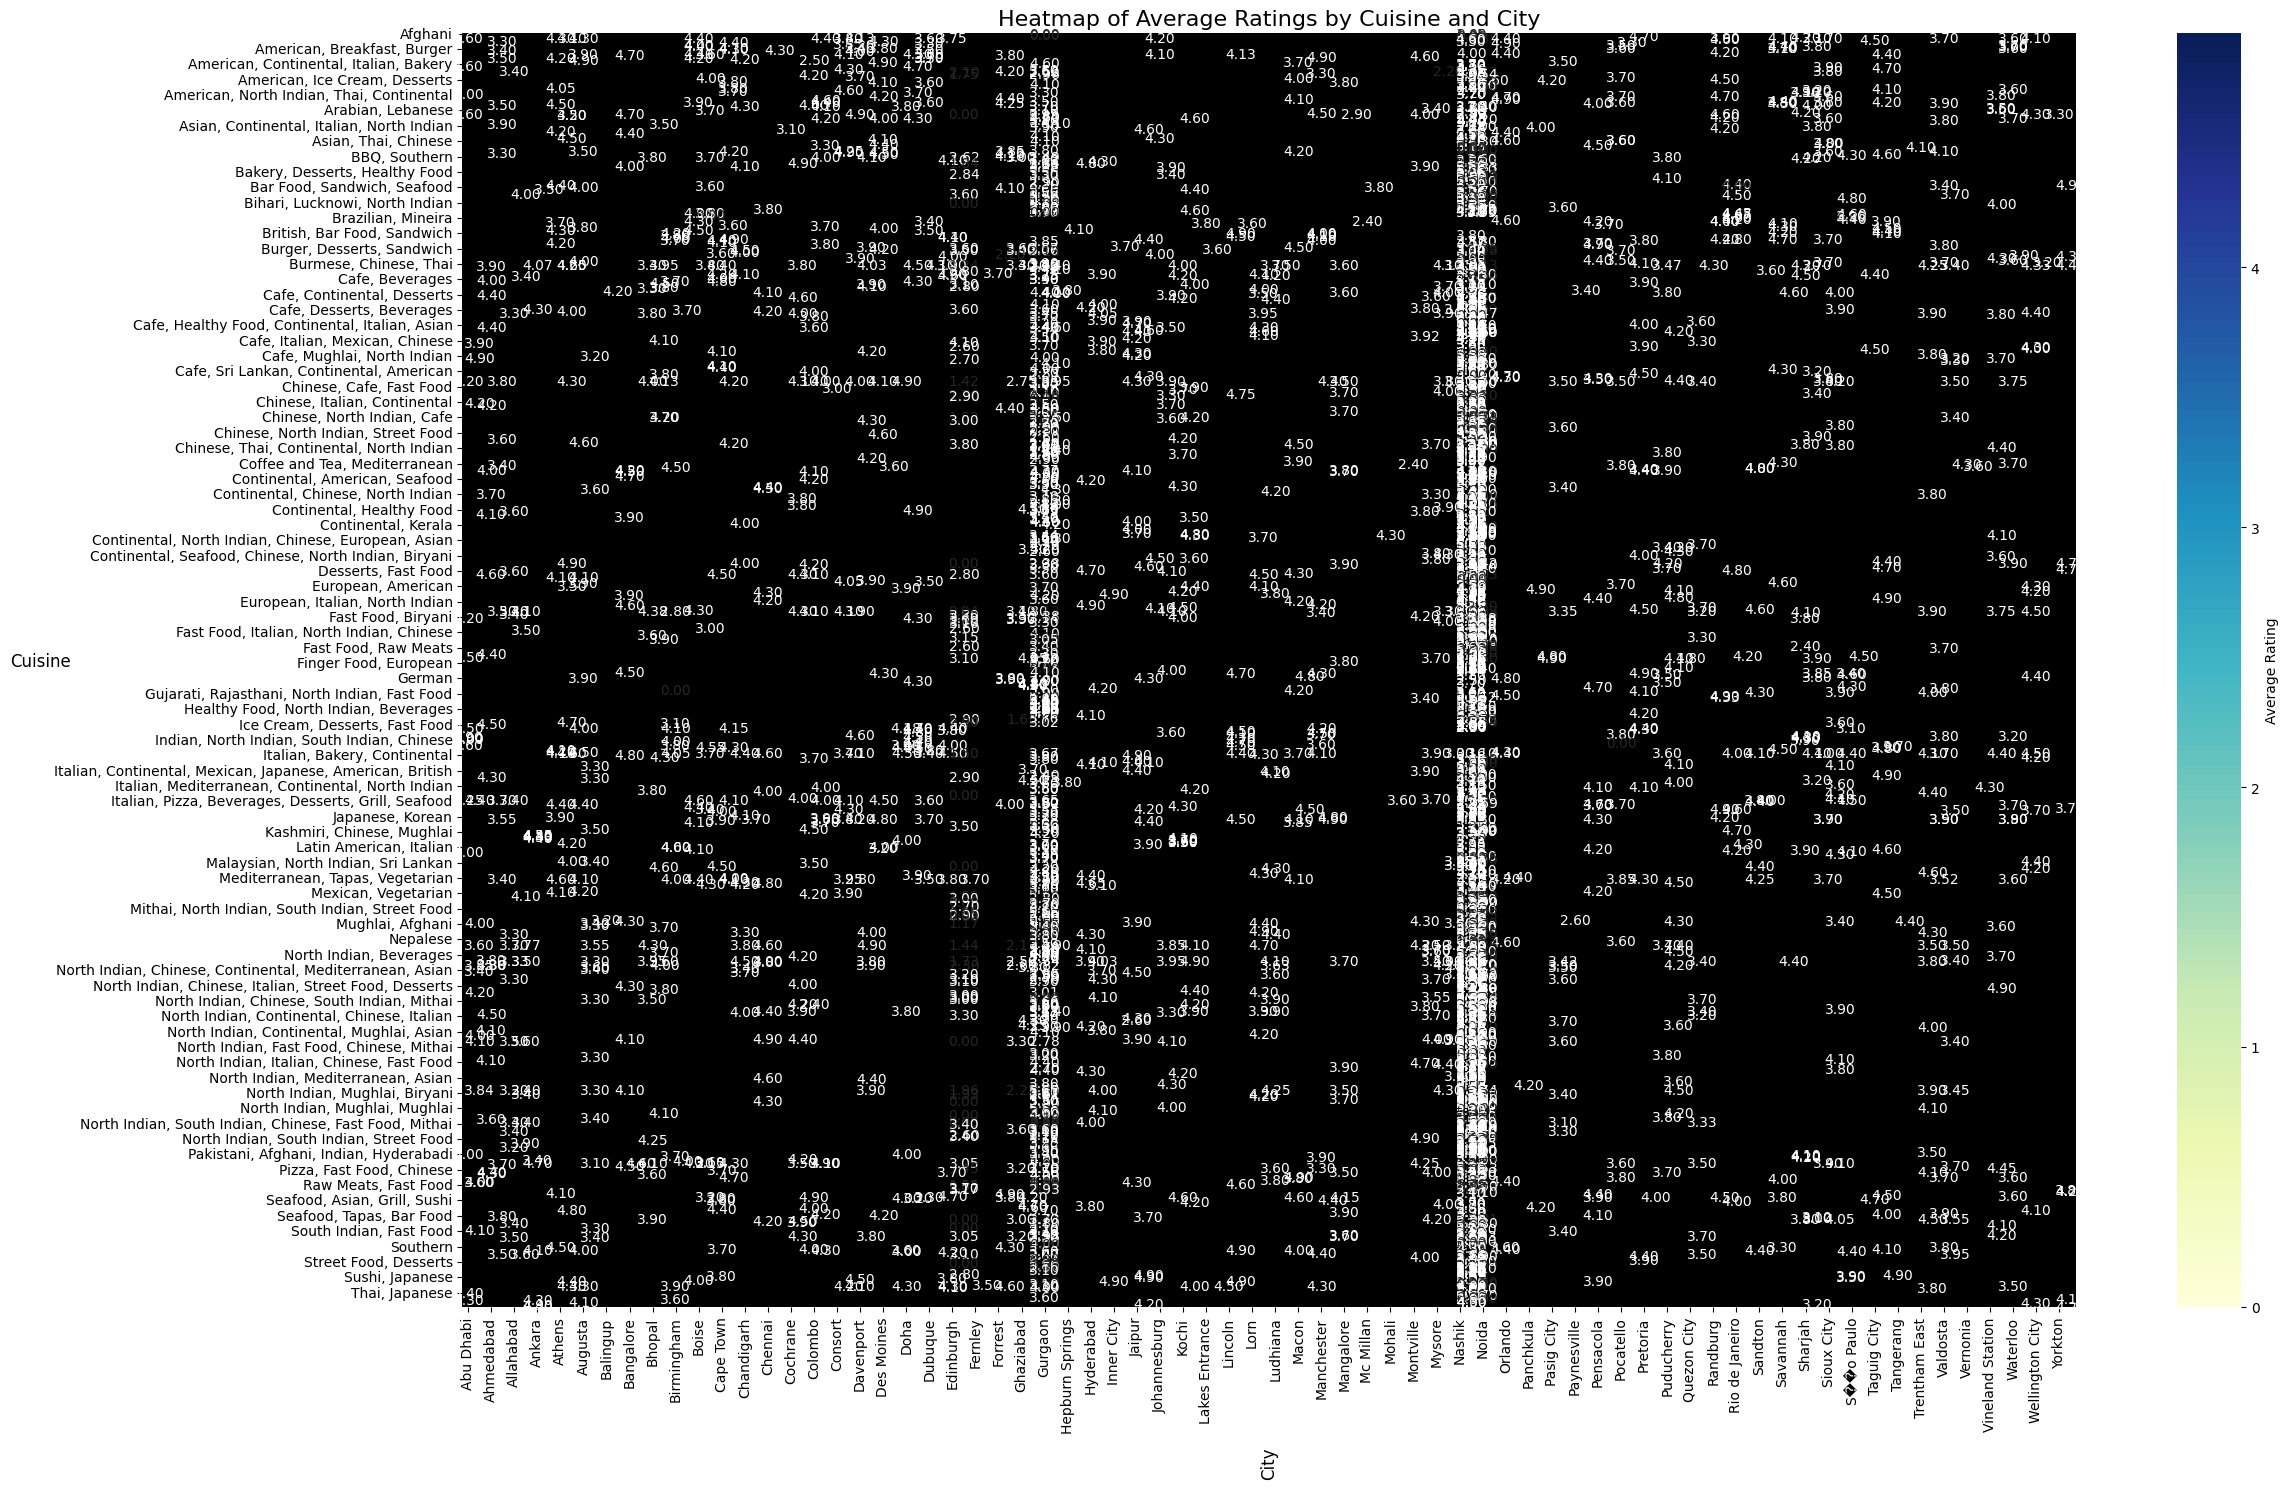

In [30]:
# Pivot data for a heatmap
heatmaps = average_ratings.pivot(index='Cuisines', columns='City', values='Aggregate rating')

# Create the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(heatmaps, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=1,
            linecolor='black',cbar_kws={'label': 'Average Rating'})

# Add title and djust appearance for better readability
plt.title('Heatmap of Average Ratings by Cuisine and City', fontsize=16)
plt.xlabel('City', fontsize=12, labelpad=10, rotation=90)
plt.ylabel('Cuisine', fontsize=12, labelpad=10, rotation=0)

plt.tight_layout()
plt.show()


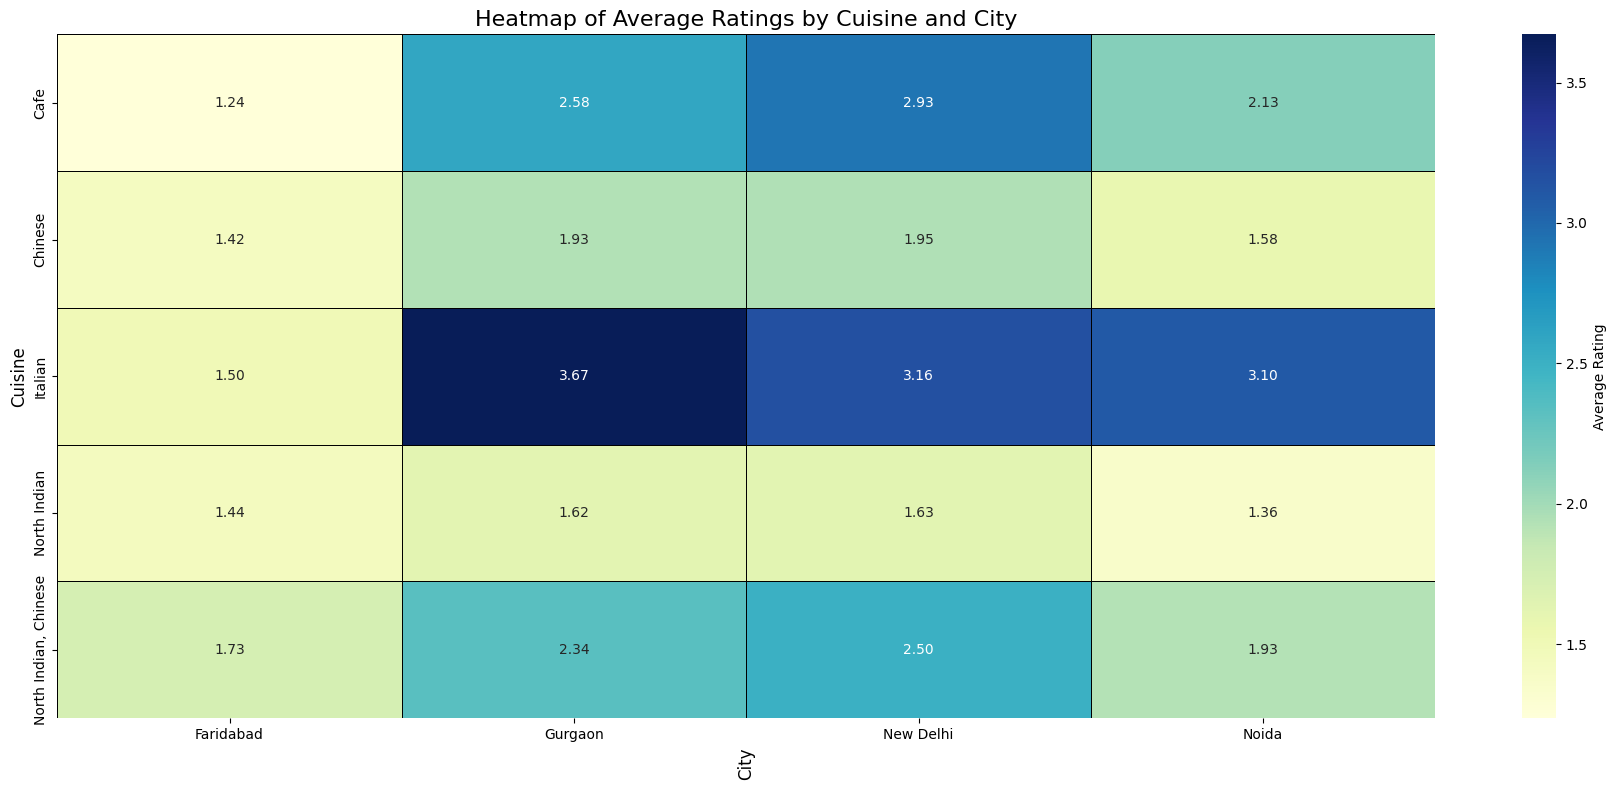

In [31]:
# Filter data to reduce overcrowding
top_cities = average_ratings['City'].value_counts().head(5).index
top_cuisines = average_ratings['Cuisines'].value_counts().head(5).index
filtered_data = average_ratings[average_ratings['City'].isin(top_cities) &
                                average_ratings['Cuisines'].isin(top_cuisines)]
heatmaps = filtered_data.pivot(index='Cuisines', columns='City', values='Aggregate rating')

# Create the heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(heatmaps, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5,
            linecolor='black', cbar_kws={'label': 'Average Rating'})

plt.title('Heatmap of Average Ratings by Cuisine and City', fontsize=16)
plt.xlabel('City', fontsize=12, rotation=90)
plt.ylabel('Cuisine', fontsize=12)
plt.tight_layout()
plt.show()


*OBSERVATION: For the purpose of visualization, i created a heatmap for matrix view. In my first data, heat map was not clear possibly due to lage amount of data. I decided to use only top cuisines and city for this.
By so doing, I observerd that Italian cuisine consistently scores higher across all cities, with Gurgaon showing the best performance (3.67)followed by New Delhi and Noida.
North Indian cuisine, on the other hand, has the lowest ratings in most cities, with average ratings hovering around 1.4 to 1.6.

I think that Italian cuisine’s higher ratings across cities might reflect its universal appeal, making it a potential area for expansion or emphasis.

### **Geospatial Analysis:Map restaurant locations using coordinates**

In [32]:
#Checking for geographic coordinates
df[['Latitude', 'Longitude']].head()

Latitude   Longitude
0  14.565443  121.027535
1  14.553708  121.014101
2  14.581404  121.056831
3  14.585318  121.056475
4  14.584450  121.057508

In [33]:
#Library installation
!pip install geopandas
!pip install folium
!pip install geopy
!pip install shapely



In [34]:
#Converting df into a geospatial data structure.
import geopandas as gpd
from shapely.geometry import Point

# Create a geometry column based on Latitude and Longitude
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS)
geo_df.crs = "EPSG:4326"  # WGS 84 CRS
geo_df.head()


Restaurant Name Country Code              City  \
0        Le Petit Souffle          162       Makati City   
1        Izakaya Kikufuji          162       Makati City   
2  Heat - Edsa Shangri-La          162  Mandaluyong City   
3                    Ooma          162  Mandaluyong City   
4             Sambo Kojin          162  Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating color Rating text  Votes  \
0               4.8   Dark Green   Excellent    314   
1               4.5   Dark Green   Excellent    591   
2               4.4        Green   Very Good    270   
3               4.9   Dark Green   Excellent    365   
4               4.8   Dark Green   Excellent    229   

                     geometry  
0  POINT (121.02754 14.56544)  
1   POINT (121.0141 14.55371)  
2   POINT (121.05683 14.5814)  
3  POINT (121.05648 14.58532)  
4  POINT (121.05751 14.58445)

### **Map restaurant locations using coordinates.**

In [35]:
#Create an Interactive Map with Folium
import folium
from folium.plugins import MarkerCluster, Fullscreen, Search

# Define a function to assign color based on restaurant rating
def get_marker_color(rating):
    if rating >= 4.5:
        return 'green'  # Excellent
    elif 4.0 <= rating < 4.5:
        return 'yellow' # Good
    elif 3.5 <= rating < 4.0:
        return 'purple'  #fair
    else:
        return 'pink'  # Poor

# Create a map centered at the mean location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5, tiles='CartoDB Positron', control_scale=True)

#Add Fullscreen option
Fullscreen(position='topright').add_to(my_map)

#Create marker cluster
Marker_cluster = MarkerCluster().add_to(my_map)

# Add locations to the map
for _, row in df.iterrows():
    color = get_marker_color(row['Aggregate rating'])
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<strong>{row['Restaurant Name']}</strong><br>Rating: {row['Aggregate rating']}",
        icon=folium.Icon(color='red')
    ).add_to(Marker_cluster)

# Add search functionality
search = Search(
    layer=Marker_cluster,
    search_label='Restaurant Name',
    placeholder='Search for a restaurant',
    collapsed=False
).add_to(my_map)

# Save the map to an HTML file
my_map.save('map.html')

# Display the map
my_map




Output hidden; open in https://colab.research.google.com to view.

In [36]:
import folium
tile_layers = folium.raster_layers.TileLayer

tile_layers

folium.raster_layers.TileLayer

*Analyze Distribution Across Cities*

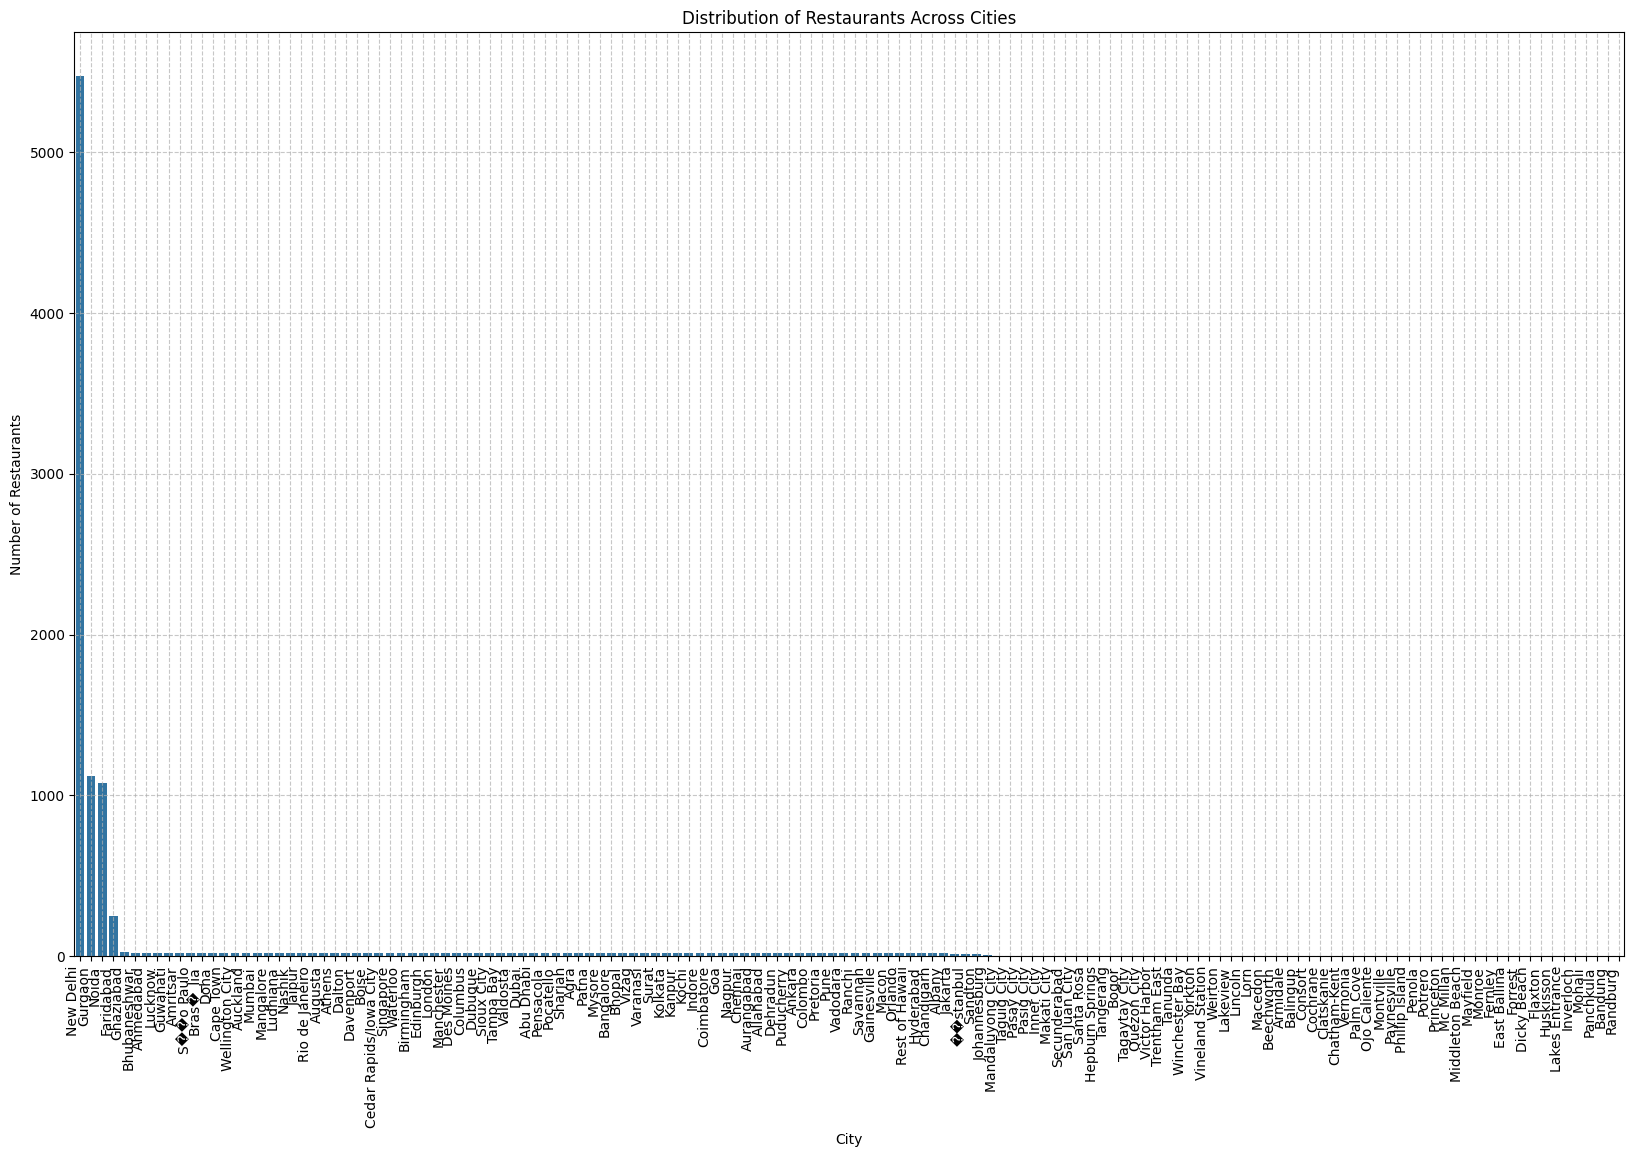

In [37]:
#Create a count plot for visualization

plt.figure(figsize=(20, 12))
sns.countplot(data=df, x='City', order=df['City'].value_counts().index)
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90, ha='right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


*OBSERVATIONS: Concentration in New Delhi:

1. New Delhi has the largest number of restaurants compared to other cities, indicating it is a major hub for dining and food businesses.

2. Cities like Gurgaon, Noida, and Faridabad follow New Delhi in terms of restaurant numbers. These cities likely form part of a broader metropolitan area with strong culinary demand.

3. Most of the other cities have significantly fewer restaurants, and some have almost none. This suggests potential underpenetration of the restaurant market or lower demand in those regions.

*INSIGHTS:
Opportunities for Expansion: Cities with fewer restaurants could represent untapped markets, depending on local demographics and demand.

Urban Focus: The concentration of restaurants in cities like New Delhi and Gurgaon suggests a strong urban demand for dining options.

Possible Overcrowding: The saturation in New Delhi might indicate high competition among restaurants there.

In [38]:
from folium.plugins import HeatMap

city_coords = df.groupby('City')[['Latitude', 'Longitude']].mean().reset_index()
city_coords['Count'] = df['City'].value_counts().values

heatmap_data = city_coords[['Latitude', 'Longitude', 'Count']].values.tolist()
Data_Cities = folium.Map(location=[city_coords['Latitude'].mean(), city_coords['Longitude'].mean()], zoom_start=5)
HeatMap(heatmap_data).add_to(Data_Cities)
Data_Cities.save('heatmap.html')
Data_Cities

* OBSERVATION:for further visualization, I decided to overlay a heatmap on the map, representing density/number of restaurants in a specific city.

*Correlate Location (City) with Ratings*

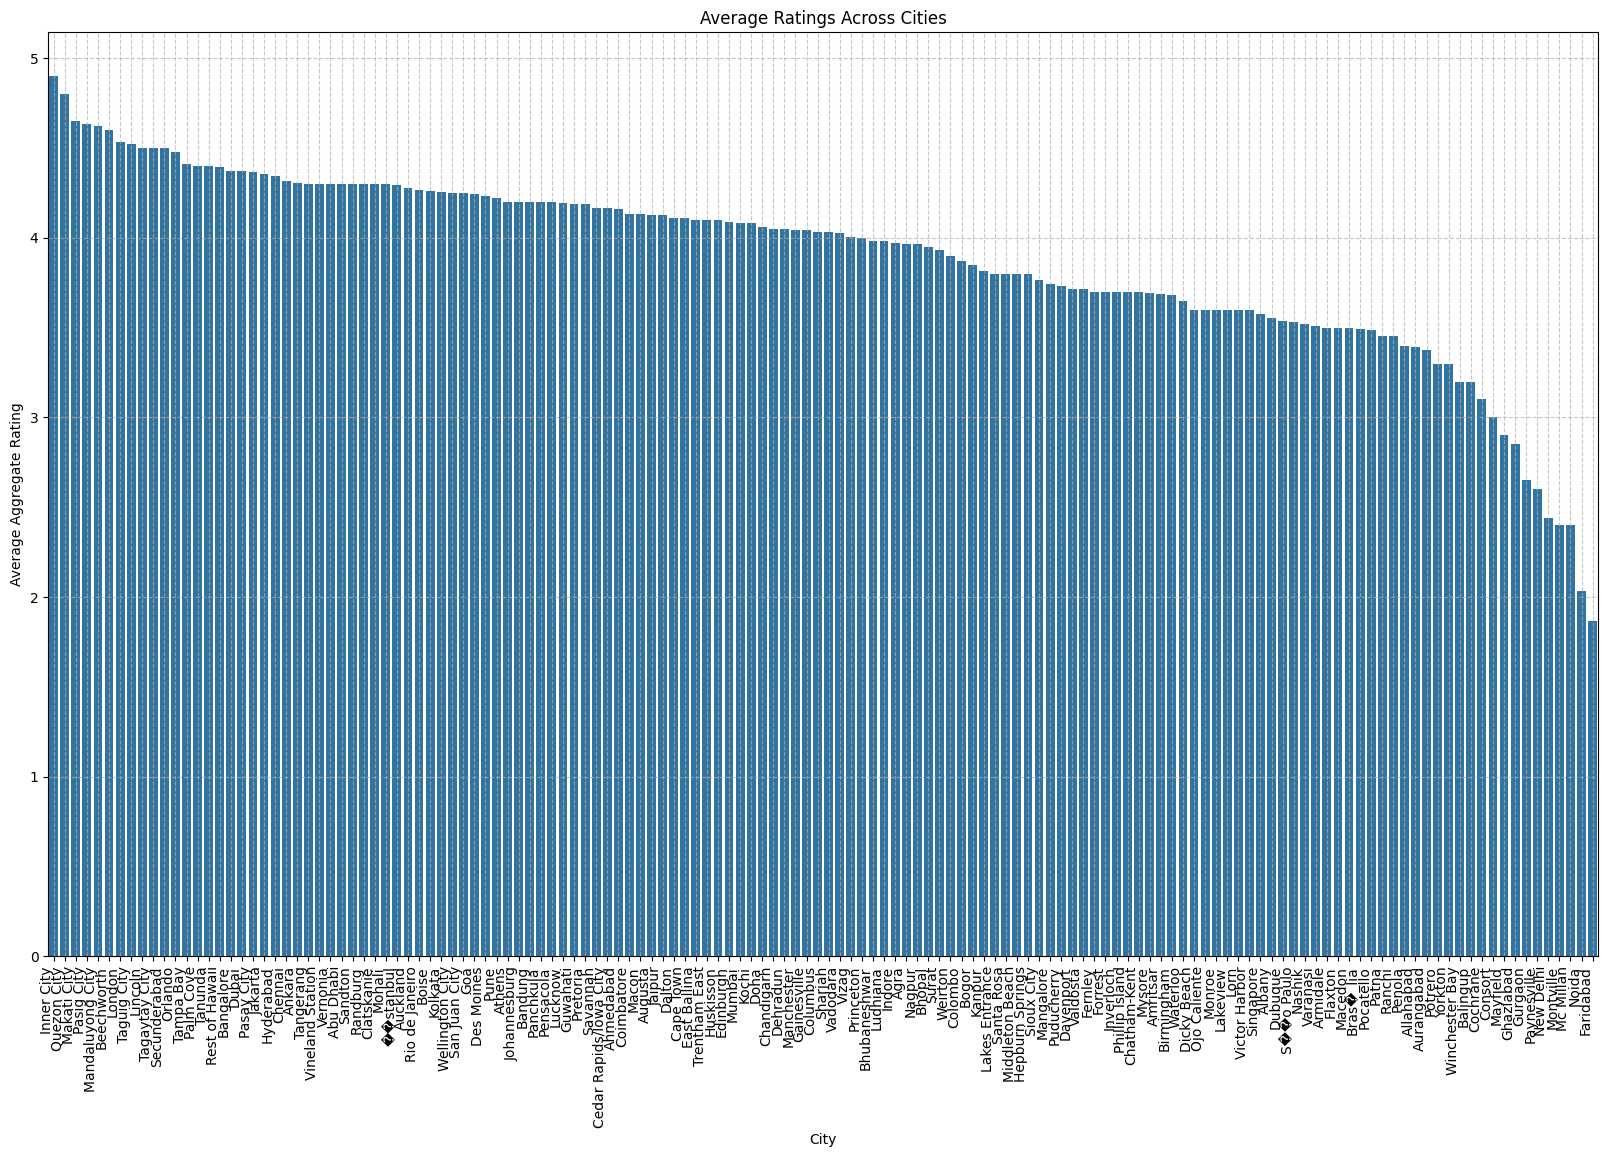

In [39]:
# Calculate average ratings per city
average_city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Bar plot of average ratings per city
plt.figure(figsize=(20, 12))
sns.barplot(x=average_city_ratings.index, y=average_city_ratings.values)
plt.title('Average Ratings Across Cities')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=90, ha='right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


*OBSERVATION: Innercity had the highest number of ratings while Faridabad had the least number of ratings. I visualizedd further using a scatter plot

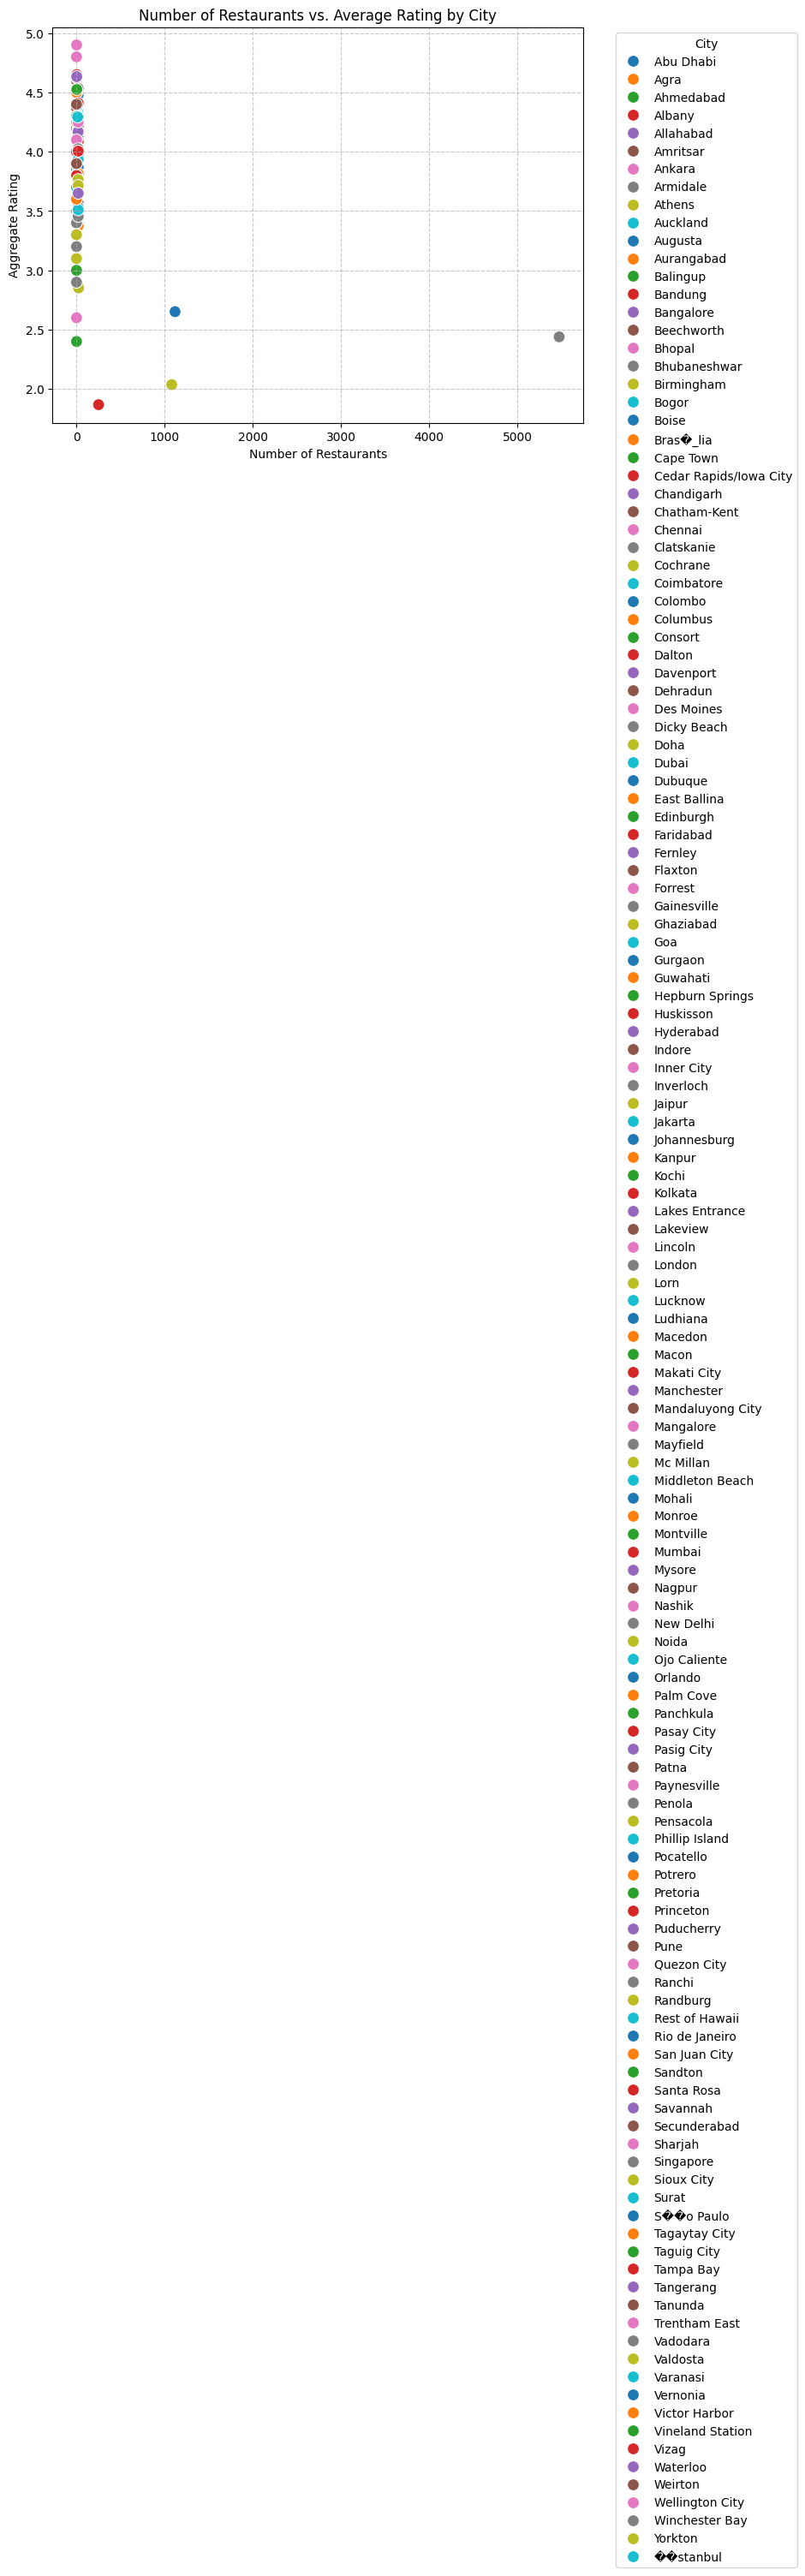

In [40]:
#Combine Analysis: Ratings vs. Number of Restaurants

# Group by 'City' and count the number of restaurants
restaurant_count = df.groupby('City').size().reset_index(name='Num_Restaurants')

# Merge the counts back into the original DataFrame
df = pd.merge(df, restaurant_count, on='City', suffixes=('', '_count'))

# Prepare a separate DataFrame for city analysis
city_analysis = df.groupby('City').agg(
    Number_of_Restaurants=('Num_Restaurants', 'first'),
    Average_Rating=('Aggregate rating', 'mean')
).reset_index()

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(data=city_analysis, x='Number_of_Restaurants', y='Average_Rating', palette='tab10', hue='City', s=100, ax=axis)

axis.set_title('Number of Restaurants vs. Average Rating by City')
axis.set_xlabel('Number of Restaurants')
axis.set_ylabel("Aggregate Rating")
axis.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
axis.grid(linestyle='--', alpha=0.7)


plt.show()


### **Determine relationship between votes and ratings.**

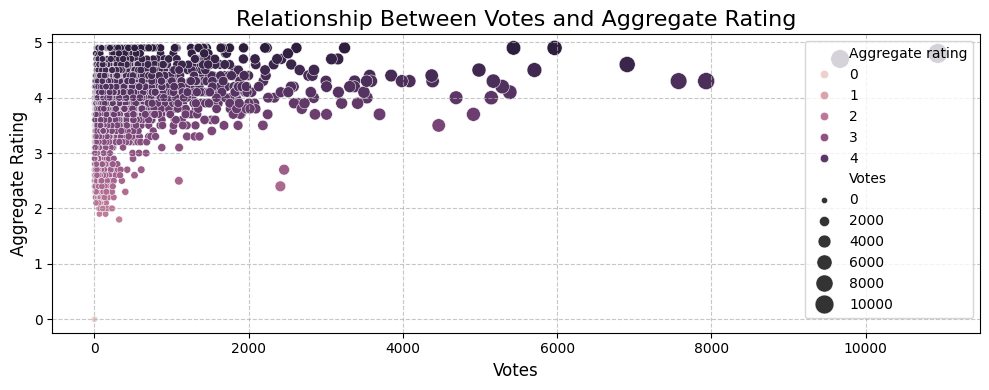

In [41]:
#Visualize the Relationship

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', hue='Aggregate rating', size='Votes', sizes=(20, 200))

# Customize the plot
plt.title('Relationship Between Votes and Aggregate Rating', fontsize=16)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*OBSERVATION:
1.  Most of the points are concentrated in the upper left corner of the plot. This indicates that many restaurants have high aggregate ratings (above 3) but receive relatively fewer votes (closer to 0).
2. Restaurants with a higher number of votes (closer to 10,000) tend to have higher aggregate ratings as well, typically between 4 and 5. This could suggest that restaurants with more votes are generally more popular and have higher-quality offerings.
3. The use of a color gradient (from lighter to darker colors) to represent the aggregate ratings makes it visually clear that darker points (higher ratings) dominate areas with more votes.

*OUTLIERS:
There are a few smaller points in the bottom of the plot (ratings closer to 0–1), which might indicate poorly rated restaurants that still have a significant number of votes.

*INSIGHTS:
Opportunity for Improvement: Restaurants with low ratings but many votes might need to address customer concerns to improve their reputation.


### **WEEK 3**

Weekly Deliverables

Cuisine Analysis: Identify highest-rated cuisines

Price Range: Compare ratings across price points

Service Features: Analyze table booking and delivery



**Identify highest-rated cuisines**

In [42]:
# Group by 'Cuisines' and calculate the mean rating for each group
HRC = df.groupby('Cuisines')['Aggregate rating'].mean()

HRC = HRC.sort_values(ascending=False)



In [43]:

HRC.head(20)


Cuisines
Burger, Bar Food, Steak            4.90
American, Burger, Grill            4.90
American, Caribbean, Seafood       4.90
American, Coffee and Tea           4.90
Mexican, American, Healthy Food    4.90
Italian, Bakery, Continental       4.90
BBQ, Breakfast, Southern           4.90
European, German                   4.90
Hawaiian, Seafood                  4.90
Sunda, Indonesian                  4.90
American, BBQ, Sandwich            4.90
World Cuisine                      4.90
Continental, Indian                4.90
American, Sandwich, Tea            4.90
Mughlai, Lucknowi                  4.90
European, Contemporary             4.90
European, Asian, Indian            4.90
Italian, Deli                      4.90
Filipino, Mexican                  4.85
Beverages, International           4.80
Name: Aggregate rating, dtype: float64

**OBSERVATION:**
1. The first 18 Cuisines (rows) had the highest rating of 4.90
2. In most of the rows,  there are different cusines listed. E.g, European, Asian and Indian.

INSIGHTS: It's difficult to decide which individual cuisine is the most rated this way. I think I should split the cuisine column into individual cuisines. What do you think sir?

**Compare ratings across price points**

In [44]:
# Group by 'Price range' and calculate the mean rating for each price range
ratings_price = df.groupby('Price range')['Aggregate rating'].mean()

ratings_price = ratings_price.sort_index(ascending=False)

ratings_price


Price range
4    3.817918
3    3.682633
2    2.941054
1    1.997476
Name: Aggregate rating, dtype: float64

**OBSERVATION**
1. The price range is from 1 to 4. I observed that the higher the price range , the higher the rating. This suggests that more expensive restaurants may provide higher quality food, service, or overall dining experience, which resonates well with customers.

It may also be that customers generally associate higher-priced establishments with better value or satisfaction.


INSIGHTS:
Restaurants in the lower price ranges (1 and 2) might explore ways to enhance their services or offerings to improve customer satisfaction and ratings.

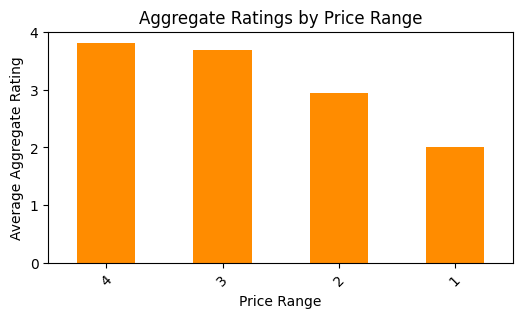

In [45]:
# Create a bar chart for visualization
ratings_price.plot(kind='bar', color='darkorange', figsize=(6, 3))


plt.title('Aggregate Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)

plt.show()


**OBSERVATION:**
I decided to plot for visuaiztion as it communicates the observation better

**Analyze table booking and delivery**

In [46]:
# Calculate average ratings
Table_booking_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean()

Table_booking_ratings



Has Table booking
No     2.557956
Yes    3.441969
Name: Aggregate rating, dtype: float64

In [47]:
Online_Delivery_ratings = df.groupby('Has Online delivery')['Aggregate rating'].mean()

Online_Delivery_ratings

Has Online delivery
No     2.463517
Yes    3.248837
Name: Aggregate rating, dtype: float64

In [48]:
# Compare votes for table booking availability
table_booking_votes = df.groupby('Has Table booking')['Votes'].mean()

print("AVERAGE VOTES FOR TABLE BOOKING:")
table_booking_votes


AVERAGE VOTES FOR TABLE BOOKING:


Has Table booking
No     129.654342
Yes    353.106218
Name: Votes, dtype: float64

In [49]:
# Compare votes for online delivery availability
online_delivery_votes = df.groupby('Has Online delivery')['Votes'].mean()

print("AVERAGE VOTES FOR ONLINE DELIVERY:")
online_delivery_votes

AVERAGE VOTES FOR ONLINE DELIVERY:


Has Online delivery
No     137.922014
Yes    211.307222
Name: Votes, dtype: float64

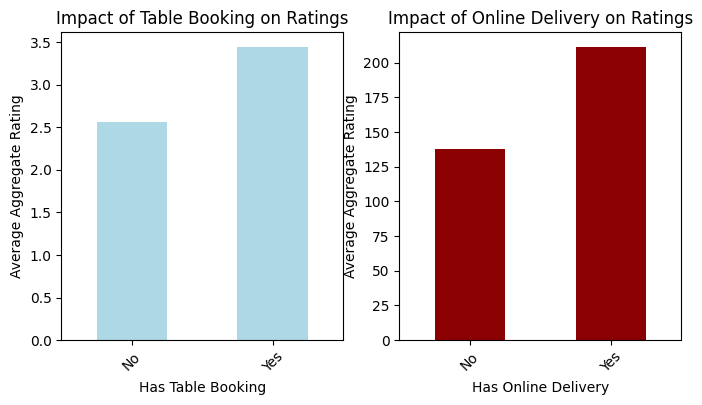

In [50]:
# Visualize table booking
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
Table_booking_ratings.plot(kind='bar', color='lightblue', title='Impact of Table Booking on Ratings')
plt.xlabel('Has Table Booking')
plt.xticks(rotation=45)
plt.ylabel('Average Aggregate Rating')

# Visualize online delivery impact
plt.subplot(1, 2, 2)
online_delivery_votes.plot(kind='bar', color='darkred', title='Impact of Online Delivery on Ratings')
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.show()


**OBSERVATION:**
From the analysis, I can deduce that
1. Restaurants offering table booking have higher average ratings (around 3.5) compared to those without table booking (approximately 2.75). Also, restaurants with online delivery options have higher average ratings (around 2.75) compared to those without (approximately 2.25).

This suggests that providing table booking enhances customer satisfaction, possibly due to convenience and better planning for diners. Online delivery is also valued by customers, potentially due to its accessibility and ease.

INSIGHTS:
Both services—table booking and online delivery—positively impact aggregate ratings, but table booking seems to have a larger effect.

These findings could guide restaurant strategies, such as prioritizing table booking for dine-in experiences and refining delivery services for remote customers.

**Analyze relationships between cuisines and ratings**

In [51]:
cuirat = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
cuirat


Cuisines
Burger, Bar Food, Steak                 4.9
American, Burger, Grill                 4.9
American, Caribbean, Seafood            4.9
American, Coffee and Tea                4.9
Mexican, American, Healthy Food         4.9
                                       ... 
Tibetan, South Indian, North Indian     0.0
Afghani, Mughlai, Chinese               0.0
Tibetan                                 0.0
Turkish, Arabian, Moroccan, Lebanese    0.0
Tibetan, Chinese, North Indian          0.0
Name: Aggregate rating, Length: 1825, dtype: float64

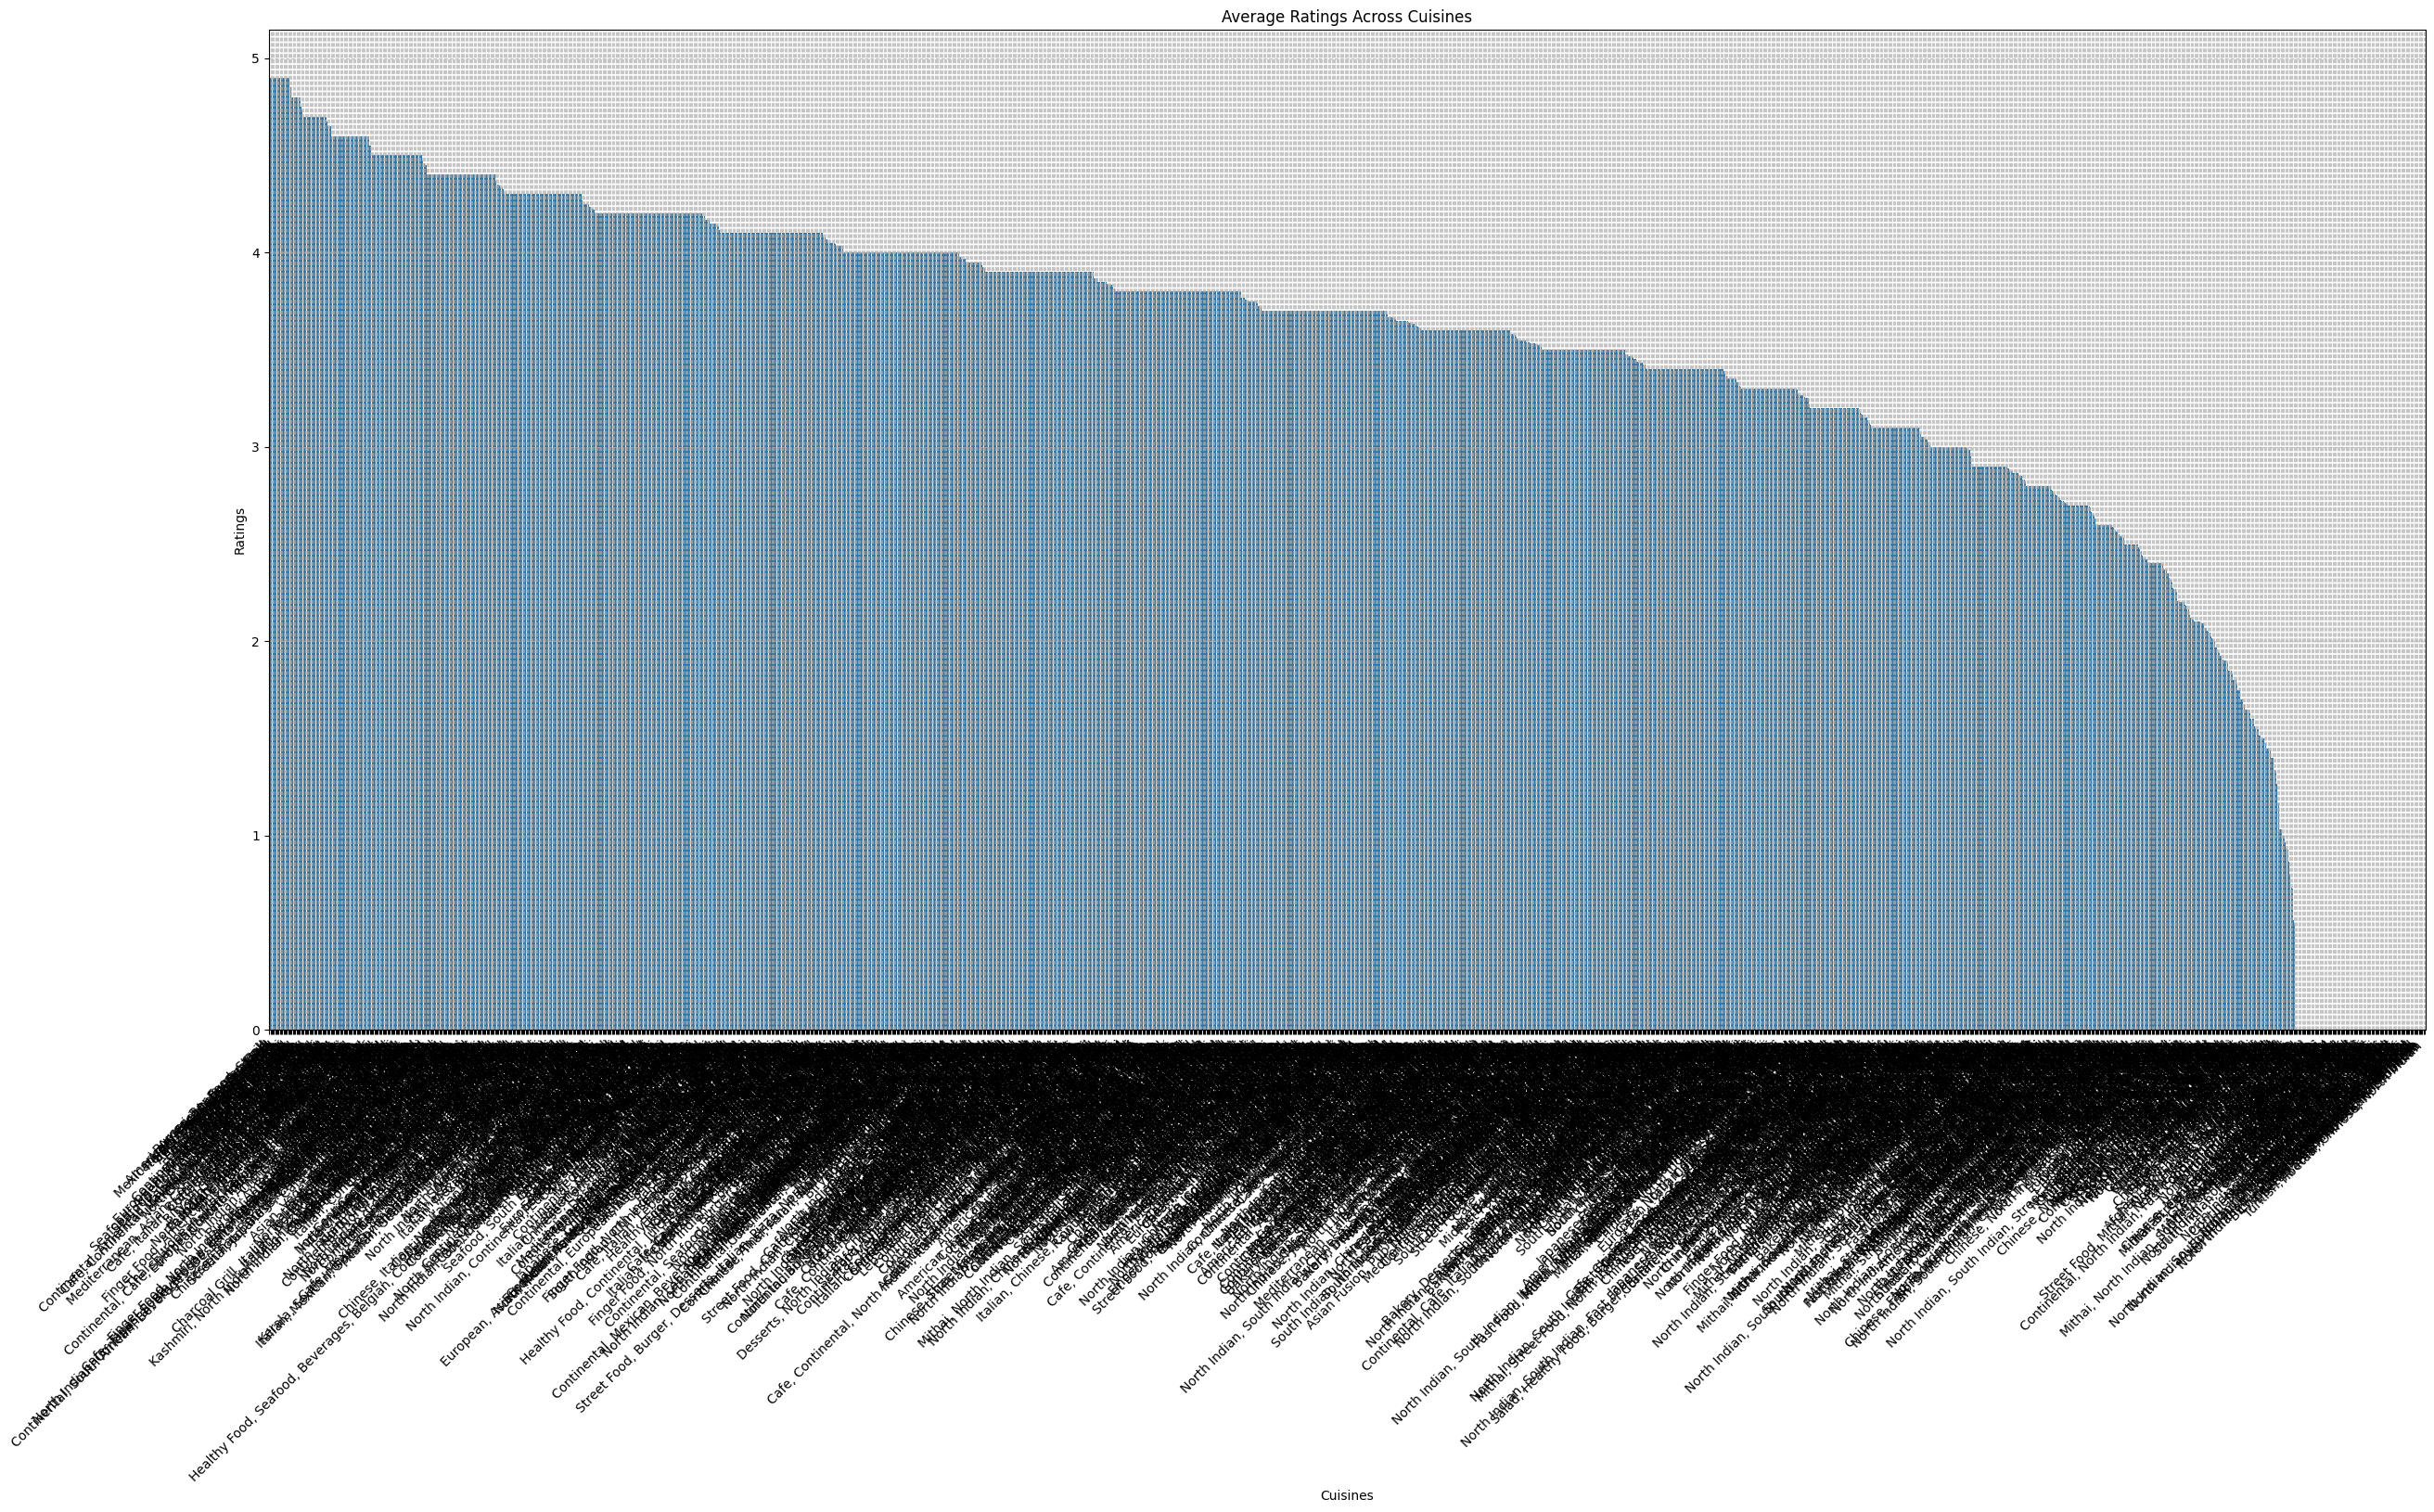

In [52]:
# Bar plot of average ratings per Cuisine
plt.figure(figsize=(30, 14))
sns.barplot(x=cuirat.index, y=cuirat.values)
plt.title('Average Ratings Across Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


**Identify popular cuisines by votes**

In [53]:
# Group by 'Cuisines' and calculate the total votes for each cuisine and sort
PopCuisines = df.groupby('Cuisines')['Votes'].sum()

PopCuisines = PopCuisines.sort_values(ascending=False)
PopCuisines.head()


Cuisines
North Indian, Mughlai    53747
North Indian             46241
North Indian, Chinese    42012
Cafe                     30657
Chinese                  21925
Name: Votes, dtype: int64

**OBSERVATION:**

North Indian Cuisines attracts more votes than the others

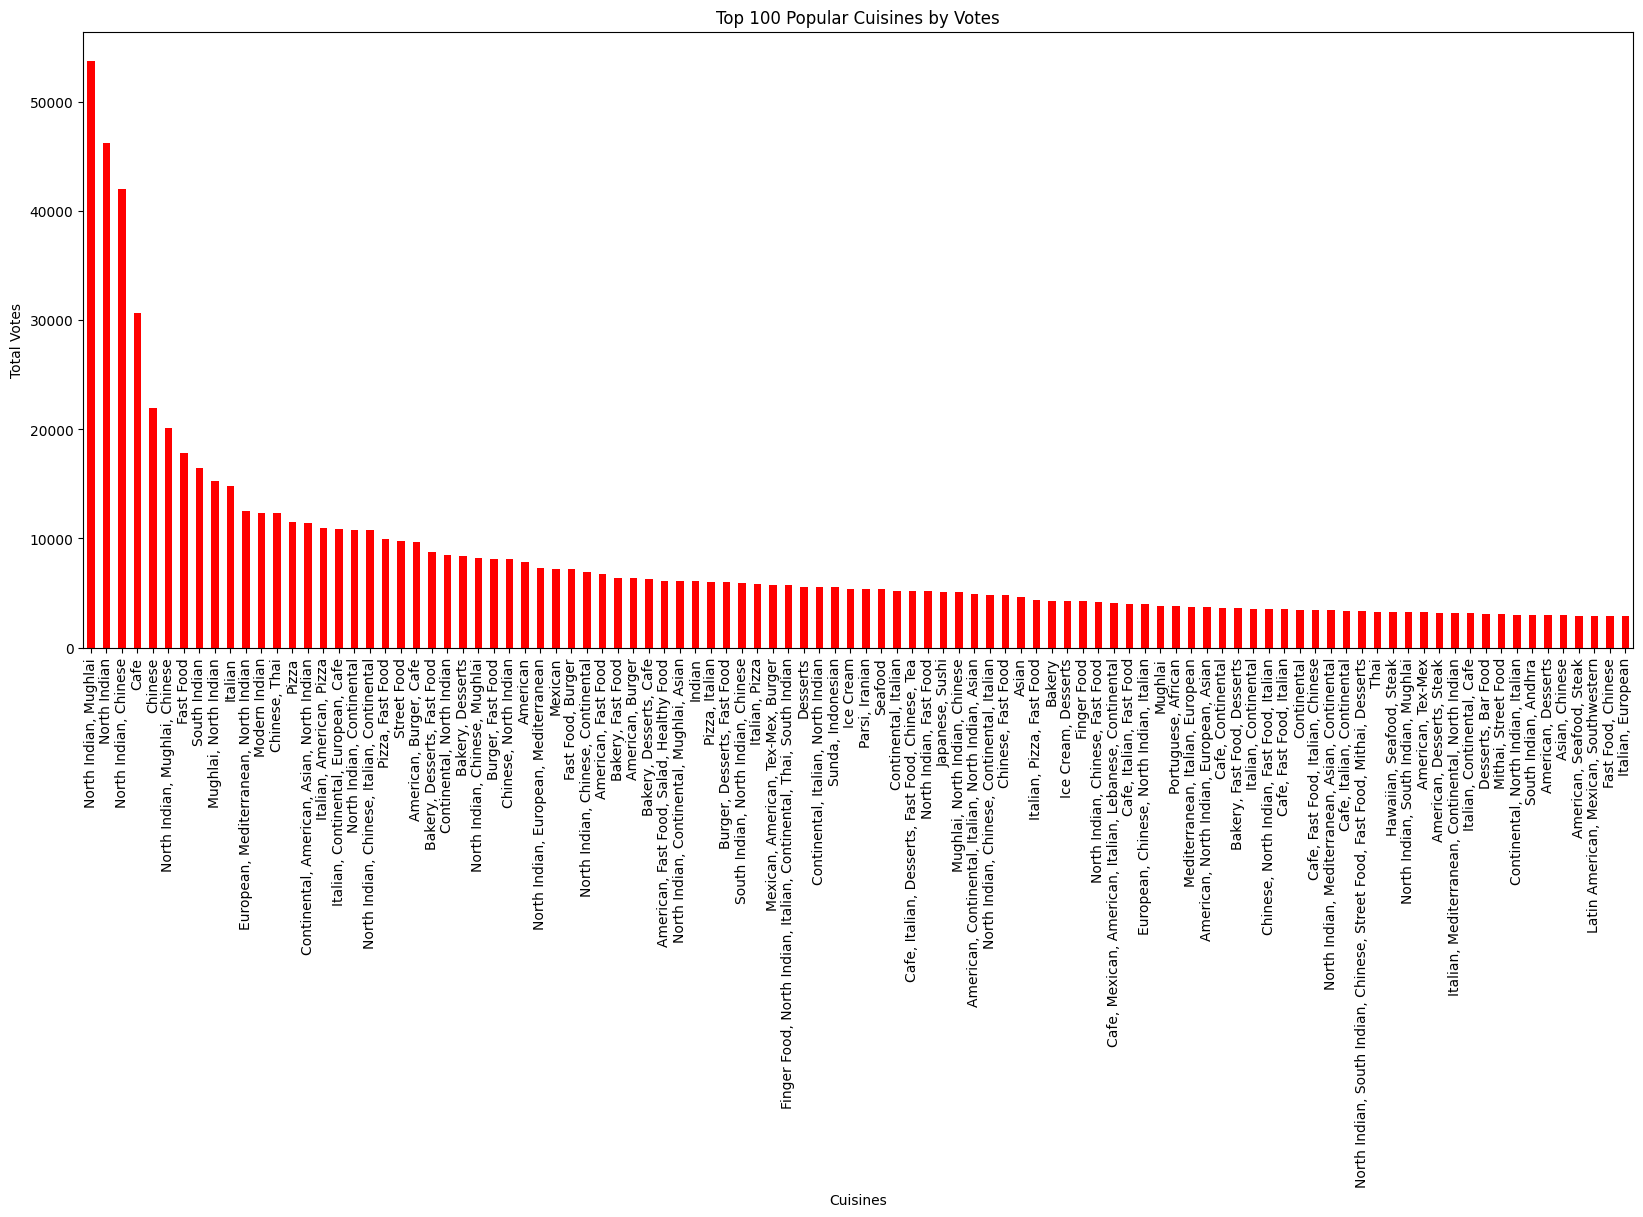

In [54]:
PopCuisines.head(100).plot(kind='bar', color='red', figsize=(20, 8))
plt.title('Top 100 Popular Cuisines by Votes')
plt.xlabel('Cuisines')
plt.ylabel('Total Votes')

plt.show()


**OBSERVATION:**
I tried visualing my data; It was difficult to use barplot to visualize all so i decided to see the first 100 cuisines and their vote range.

Combination of North Indian, Mughali had the highest votes.

**Online Delivery Analysis:
Calculate percentage of
restaurants offering
delivery. Analyze availability
across different price
ranges.**

In [55]:
# check the total number of restaurants
total_restaurants = len(df)
delivery_restaurants = len(df[df['Has Online delivery'] == 'Yes'])

In [56]:
#Calculate the overall percentage
overall_percentage = (delivery_restaurants / total_restaurants) * 100

print(f"Overall, {overall_percentage:.2f}% of restaurants offer delivery.")


Overall, 25.69% of restaurants offer delivery.


In [57]:
# Group by price range and calculate percentages
price_range_data = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
price_range_percentage = price_range_data.get('Yes', 0) * 100
price_range_percentage


Price range
1    15.795403
2    41.310633
3    29.252669
4     9.044369
Name: Yes, dtype: float64

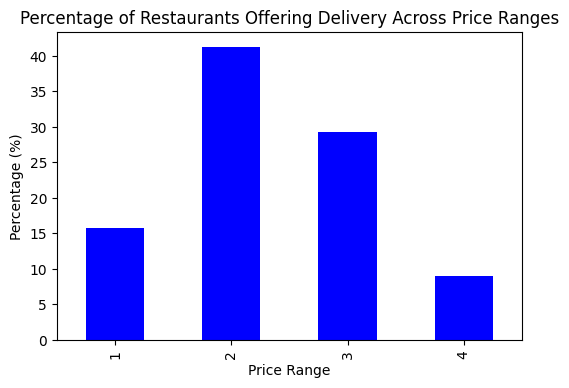

In [58]:
#Visualize the data
price_range_percentage.plot(kind='bar', color='blue', figsize=(6, 4))
plt.title('Percentage of Restaurants Offering Delivery Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.show()

**OBSERVATIONS:**
1. 	Price range 2 has the highest percentage (41.31%) of restaurants offering online delivery, followed by price range 3 (29.25%). This suggests that mid-priced restaurants are more likely to provide delivery services, potentially catering to a wide audience who seek affordability and convenience.

2. Price range 1 have a relatively low percentage (15.80%) of delivery services, which might reflect logistical or resource constraints.

3. Price range 4 show the lowest percentage (9.04%), possibly because these establishments focus more on premium dine-in experiences rather than delivery.

INSIGHTS:

Restaurants with price ranges 2 and 3 may strategically invest in delivery options as their target demographic values convenience and may be more open to ordering meals at home.

For Lower-Priced Restaurants (Price Range 1), There might be opportunities to explore delivery partnerships to capture a larger audience.

For High-End Restaurants (Price Range 4), Offering exclusive or premium delivery options could be a niche but valuable way to stand out.

**Customer Preferences:
Identify specific cuisines that consistently receive higher
ratings. Determine city-specific preferences.**

In [59]:
#Group by City and Cuisine, and calculate average ratings
cuisine_city_ratings = df.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().reset_index()




In [60]:
#Identify top-rated cuisines by sorting within each city
cuisine_city_ratings = cuisine_city_ratings.sort_values(by=['City', 'Aggregate rating'], ascending=[True, False])



In [61]:
cuisine_city_ratings


City                            Cuisines  Aggregate rating
8     Abu Dhabi                Indian, North Indian              4.90
0     Abu Dhabi                            American              4.60
1     Abu Dhabi                  American, Desserts              4.60
3     Abu Dhabi                               Asian              4.60
6     Abu Dhabi           Filipino, Japanese, Asian              4.50
...         ...                                 ...               ...
3021  ��stanbul  Restaurant Cafe, Turkish, Desserts              4.20
3023  ��stanbul     World Cuisine, Patisserie, Cafe              4.20
3022  ��stanbul                             Turkish              4.10
3019  ��stanbul                     Restaurant Cafe              3.85
3018  ��stanbul              Italian, World Cuisine              3.70

[3024 rows x 3 columns]

***WEEK FOUR**

**Feature Engineering: Extract additional features from existing columns. Create new features by encoding categorical variables.**

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Restaurant Name       9542 non-null   object  
 1   Country Code          9542 non-null   category
 2   City                  9542 non-null   object  
 3   Locality Verbose      9542 non-null   object  
 4   Longitude             9542 non-null   float64 
 5   Latitude              9542 non-null   float64 
 6   Cuisines              9542 non-null   object  
 7   Average Cost for two  9542 non-null   int64   
 8   Currency              9542 non-null   object  
 9   Has Table booking     9542 non-null   object  
 10  Has Online delivery   9542 non-null   object  
 11  Is delivering now     9542 non-null   object  
 12  Price range           9542 non-null   int64   
 13  Aggregate rating      9542 non-null   float64 
 14  Rating color          9542 non-null   object  
 15  Rati

In [63]:
# Data Splitting

X = df.drop(columns=['Aggregate rating'])
Y = df['Aggregate rating']

In [64]:
X

Restaurant Name Country Code              City  \
0             Le Petit Souffle          162       Makati City   
1             Izakaya Kikufuji          162       Makati City   
2       Heat - Edsa Shangri-La          162  Mandaluyong City   
3                         Ooma          162  Mandaluyong City   
4                  Sambo Kojin          162  Mandaluyong City   
...                        ...          ...               ...   
9537               Naml۱ Gurme          208         ��stanbul   
9538              Ceviz A��ac۱          208         ��stanbul   
9539                     Huqqa          208         ��stanbul   
9540               A���k Kahve          208         ��stanbul   
9541  Walter's Coffee Roastery          208         ��stanbul   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9537                                Karak�_y, ��stanbul   28.977392   
9538                               Ko��uyolu, ��stanbul   29.041297   
9539                             Kuru�_e��me, ��stanbul   29.034640   
9540                             Kuru�_e��me, ��stanbul   29.036019   
9541                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9537  41.022793                           Turkish                    80   
9538  41.009847   World Cuisine, Patisserie, Cafe                   105   
9539  41.055817            Italian, World Cuisine                   170   
9540  41.057979                   Restaurant Cafe                   120   
9541  40.984776                              Cafe                    55   

              Currency Has Table booking Has Online delivery  \
0     Botswana Pula(P)               Yes                  No   
1     Botswana Pula(P)               Yes                  No   
2     Botswana Pula(P)               Yes                  No   
3     Botswana Pula(P)                No                  No   
4     Botswana Pula(P)               Yes                  No   
...                ...               ...                 ...   
9537  Turkish Lira(TL)                No                  No   
9538  Turkish Lira(TL)                No                  No   
9539  Turkish Lira(TL)                No                  No   
9540  Turkish Lira(TL)                No                  No   
9541  Turkish Lira(TL)                No                  No   

     Is delivering now  Price range Rating color Rating text  Votes  \
0                   No            3   Dark Green   Excellent    314   
1                   No            3   Dark Green   Excellent    591   
2                   No            4        Green   Very Good    270   
3                   No            4   Dark Green   Excellent    365   
4                   No            4   Dark Green   Excellent    229   
...                ...          ...          ...         ...    ...   
9537                No            3        Green   Very Good    788   
9538                No            3        Green   Very Good   1034   
9539                No            4       Yellow        Good    661   
9

In [65]:
# Import train and test sets
from sklearn.model_selection import train_test_split

In [66]:
train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [67]:
print(train_input.shape)
print(test_input.shape)

(7633, 17)
(1909, 17)


In [68]:
#Create Encoder (One-hot Encoding)
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [69]:
encoder = OneHotEncoder(drop='first')

In [70]:
train_cat = encoder.fit_transform(train_input[cat_cols])
test_cat = encoder.transform(test_input[cat_cols])
train_cat.toarray()

ValueError: Found unknown categories ['Chokoreto - The Cake Design Studio', 'Delhi Rasoi', 'Makhmali Kebabs', 'Mama Tao', 'Pakeeza Chicken Corner', 'Choudhary Dhaba', 'Amritsar Express', 'Panchwati Rasoi', 'Vine - The St. Regis', 'Sethi Restaurant', 'Bite & More', 'Balaji Restaurant & Sweets', 'I Am', 'Southern Santushti Cafe', 'Amici Gourmet Pizza', 'Bharat Sweet House', 'The Tandoor Hut', 'Oh! Fudge', 'La-Nawaab', 'Young Wild Free Cafe', 'China Kitchen', 'Bhane', 'Shri Bikaner Sweets', 'Deli - Crowne Plaza', 'Cafe Trance & Lounge', 'Annapurna Caterings', 'RoadRomeo', 'Kadimi Dukan', 'Prime Bakery', "Gayatri's Break Point Restaurant", 'Sangeeta Dhaba', 'Chick Chicken Barbeque', 'Punjab Sweet House', 'Chatori Zubaan 2', "KT's Shik-Shack", 'FLYP@MTV', 'Pearls Regency', 'Om Ji Bhature Wale', "Dhaba Cash 'N' Carry Kitchen", 'Cafe Corner', 'Mustake Multicuisine Restaurant', 'Organic Express', 'Delish BBQ', 'The Spot', 'Caf�� Daniel Briand', "Ashoka's Veg Restaurant", 'Hot Wok', 'AB Fast N Food', 'Bengali Sweet House', 'Cha cTea', 'Kathi Kabab', 'Eight - The Langham Hotel', 'Suresh Fast Food', 'The Momoz Hub', 'Bruncheez', 'Zaika Amritsari', "Bombay's Royal China", 'Pizza Castle', 'Zoe', 'Outback Steakhouse', 'Zen Japanese Steakhouse and Sushi Bar', 'Just Veg', 'Qubitos - The Terrace Cafe', "RD's Authentic Aroma", 'Whitebull Hotel', 'The Caspian', 'Patiala', 'Balti', 'Shri Radhe', 'Samrat', 'Gulshan Dhaba', 'Sree Krishna Udupi', 'Qureshi', 'Maharaja Bhog', 'Shree Krishna Dhaba', 'More Than Cafe', 'The Witchery & The Secret Garden', 'Rookery', 'The Flying Pan', "Aggarwal's Sweets", 'Dawat-e-Nawab - Radisson Blu', 'The Machine Shed Restaurant', 'Craving Cure', 'Cakes & Muffins', 'Nawwarah', 'China Leaf', 'Hakka Haus', 'Froth On Top', 'Shree Balaji Bhojnalaya', 'Turban Tadka', "Banzara's", 'Dhabha 27', 'The Vintage Bakers', 'Kar C Lounge & Restaurant', 'Cascades - The Grand New Delhi', 'Zest Bar and Lounge', "Monster's Cafe", 'The Krib', 'Indus Flavour', 'Veg Aroma', 'Rajinder Da Dhaba', 'Karachi Bakery', 'Rock Cafe', 'Raj Bakers And Confectioners', 'Dimsum Democracy', 'Lakshadweep', 'Muncheezz', 'Taste Zone', 'Thugs - Hotel Broadway', "Mr. Dunderbak's Biergarten and Marketplatz", 'Georgia Dakota', 'Cafe Sante', 'New York Slice - Express', 'Sweet Sensations', 'Chaiwaalas', "Aviram's Chinese Kitchen", 'Longstreet Cafe', 'Kaka Restaurant', 'NCR Cafe', 'M I Food Center', 'Hangout - A House Of Kathis', 'Moon Light Sweets', 'Chop Shop', 'Oro The Bar - Radisson Blu', "Shepherd's", "Depaul's", 'Paras Chicken Point', 'The Boozy Cow', 'Trattoria Fresco', 'Clocked', 'Golden Tandoor', 'Adventure Food', 'Con�_u', 'Hungry House Pizzas & More', 'Valentine Coffee Bar', 'Indian Special Hot Momos', 'Etal The Lounge Bar', 'The Vintage Avenue', 'FSB', 'JAL - A Jungle Restaurant', 'Circle Cafe and Bar', 'Al Saad Foods', "Bedi's Kabab Corner", 'Night Safari Cafe', 'Al-Sameer', "Teedo's Cake Inn", 'Dimcha', 'JAIL - Behind The Bar', 'Bosphorous Turkish Cuisine', 'Parallel', 'Ashok Chaat Corner', 'The One - Le Meridien', 'Tako Cheena by Pom Pom', 'New Lazeez Tandoor', 'Da pizzeria', 'Akbars', "Al-Kausar's", 'Sandubas Caf��', 'Mochamania', 'Food Destination', "Namdhari's Icecream & Bakers", 'Cafe Friends', 'Kerala Kitchen & Restaurant', 'Carpedium', 'Frozen Grillz', 'Anand Restaurant', "Ashoka's Ice Zone", "Uncle Jack's", 'Amul Cafe', 'Calzone- Dine & Rooftop Lounge', 'Bake My Wish', 'Three Olives', 'Milan Food', 'Shake Shack', 'Republic Of Food Lovers', 'Chatori Zubaan Chur Chur Naan', 'Centro', 'Silver Streak', 'Hang Out', 'Break Fast Point', 'Mitalis Kitchen', 'Escondido Tapas', 'Foresto Lawn & Restaurant', 'Pishori Chicken Corner', 'New South Indian & Chinese Foods', 'The Kimchi Project', 'New Punjabi Dhaba and Caterers', 'Om Saravana Bhavan', 'Dimsum & Co.', 'The Old Baker - Jaypee Vasant Continental', 'A���k Kahve', 'Walk In The Woods', 'Gold Resto Bar', "Burger's King", 'Rajasthali', '28 Capri Italy', 'Zaika of Dilli 6', 'Delicacies', 'Hungry Buffoons', 'Cafe Point', 'Caf�� Foreground', "Lily Food's", 'Mid Night Khana', 'Rambhog', 'Badri Prasad Ramesh Kumar Caterers', 'Firangi N More', 'The Hangout by 1861', 'Kebabplus', 'Bake-a-boo', 'Dialogue Lounge & Caf��', 'Yadav Ji Chholey Bhature', 'The Grill Mill', 'Phonebooth Caf��', 'Mr.', 'My Fathers Place', 'Ashok & Ashok Meat Dhaba', 'Apsara Restaurant', 'New China Town', 'Shanghai Dreams', 'Above & Beyond', 'Radha Rani Bakery', 'Perron', 'Melange - The Pllazio Hotel', 'Active Sushi', 'Vaishno Amritsari Dhaba', 'Moti Mahal Delux - Tandooori Trail', 'Native Cafe', 'Noida Cakes Online', 'Al Quresh', 'Cafe Bethak', "Aunty's Kitchen", 'Metro Dhaba', "Cake'ry", 'Bites - Leisure Inn', 'Hot & Tasty Chinese Food', 'Curry Capital - Hotel Classic Diplomat', 'Zaika-E-Chaap Express', 'Wraps Cafe', 'Aapni Dhani', 'Lounge Bakery', 'Himalya Chinese', "Nagpal's", 'Mr. Gold', 'The Street- Curries & Grills', 'Cafe Culture', 'El Jalisciense Mexican Restaurant', 'Yari', 'Meeting Point Corner', 'The Basement Caf��', 'Destination Live', "Nathu's Pastry Shop", 'Dips', 'Satguru Di Hatti', 'Hooters', 'Chokho Jeeman Marwari Jain Bhojanalya', "Hunger's Hut", '23 On Hazelwood', 'Swaad Ka Khazana', 'Krispy Kitchen', 'DZI House', 'Ding Ding', 'Laxmi Food Corner', 'Alkakori Alkauser', 'Adda The Spice Affair', 'Sona Bridge Hotel', 'Kumaon Dhaba & Service', 'Shri Rudram', 'eastWEST - Radisson Hotel', 'FOA - The Flavours of Arabia', 'Hungry Gopal', 'Opium Bar - Hotel City Park', 'AL Maroosh', 'Cheese Pizza', 'Snack Junction', "Bread'D Bites", 'Cafe Coffee Day The Square', 'Homeys Cafe', 'Chickenette', '6 Packs Momos', 'The Latitude - Radisson Blu', 'Club 44', "Ting's Red Lantern", 'S.K. Fast Food', 'Front Food Corner', 'Mafia 2.0', 'Muradabadi Biryani Centre', 'Apna Dhaba and Caters', 'Big Shot Bar - Country Inn & Suites', 'UFO', 'Quiosque Chopp Brahma', 'Mumbai Central Street Food', "Mummy's Kitchen", '17 Degrees', 'Al Yousuf', 'Pizza Central', 'Royal Sweets', 'Spring - Radisson Blu Plaza', "It's Pizza Town", 'South King Restaurant', "Mini's Royal Cafe", 'Lemon Drops', 'Take n Taste Shawarma Zone', 'Seasonal Tastes - The Westin Gurgaon', 'Aggarwal Confectionary', 'Hook Up', 'Prego - The Westin Gurgaon', 'Drinks At Stake - Bar Exchange', 'Uforia', 'Shiparma Shri', 'Grill King Kabab & Curries', 'Kasturi Family Restaurant', 'The Street Kitchen', 'Liquid Lounge', 'Punjabi Paratha Station', 'Pardeep Corner', 'Garam Masala Food Corner', 'Longhorn Steakhouse', 'Stuffed Kathi Roll', 'Dilli Gate', 'Sahib Jhatka Chicken Shop', 'Swadist Bhojnalaya', 'Band Baaja Baaraat', 'Chatto Chapati', "Kay's Food Land", 'Shree Ganesh M Cafe', 'Cafemiz', "The Baithak's", "Heaven's Shawarma", 'Cafe Al Fresco by Cantina Bodega', 'Lazeez Foods', 'Punjabi Jaika', 'Evergreen Food Corner', 'Delhi Darbar Dhaba', 'Foodieholic', 'Veg Darbar - The Royal Taste', 'Jo Jo Chinese Fast Food', 'Sage', 'Damascena Coffee House', 'Game n Grillz', "Sierra's Mexican Restaurant", 'Crispers', 'Balaji Eating Point', 'Al- Laziz', 'Shama Muradabadi Chicken Corner', 'Akash Deep', 'Samavar - The Ashok', 'The Kebab Company', 'MyLoveBiryani.Com', 'Ridhi Sidhi', 'Truly Yours', 'Dabas Ke Special Chole Bhature', 'Mikky Peshawari', 'Burger Queen Drive In', 'Lord of the Drinks Forum', 'Fatburger', 'HTW Bakers', "Wangchuk's Ladakhi Kitchen", 'Kaka Da Dhaba', 'Mr. Choy', 'Babu Soup Wala', 'Amit Hotel', 'Sandwich Factory', 'Chi Kitchen', 'hug!', 'Bobby Veg Corner', 'Spiral - Sofitel Philippine Plaza Manila', 'Bittercreek Ale House', 'New Town Pastry Shop - Park Plaza', 'Chhote Nawab', 'Kafe Kulture', 'Nik Bakers', 'The Noodle Box Co.', 'Indian Bites', 'High Street Kitchen & Bar', 'Majlis-e-Mughal', 'Hunger Must Die', 'Sugary Affairs', 'Sprinkles Cup & Cake', 'Shankar Chinese Foods', "Ben's Foods", 'Burger Unlimited Kitchen', 'Cafe De Bienka', "DePalma's Italian Cafe - East Side", 'Dazzle Pastry Shop', 'Metropolitan Cafe', 'PappaRich', 'Hum Sabki Rasoi', 'Buffalo Wild Wings', 'Midnight Fries', 'Caf�� Doo Ghoont', 'Hotel Delhi 43', 'Lahori Restaurant', 'The Fresh Chicken Store', '3H Kitchen', 'Anwar Food Corner', 'Karak�_y G�_ll�_o��lu', 'Balay Dako', "Chacha's Take Away", 'Radha Swami Cool Hut', 'Cafe Bonkerz', 'Scoops', 'Mahadev Dhaba', 'Basil With A Twist', 'Daawat-e-Mehak', 'El Amigos Kitchen', 'Cream Centre', 'Moriarty Delivers', 'Desi Kukkad', 'Chor Bizarre', 'Relax Xpress', 'Nawabi Mughlai Zaika', 'Fresh and Fit Ghar Ka Khana', 'Samosa Street', '4 Barrels Caf�� & Lounge', 'Variety of Shawarmas', 'PomoDoro Bistro', 'Chung Fa', "Vijeta's Happy Kitchen", 'Lala Ji Sweets', 'Angrezee Choupal', "Uncle's", 'Sufiaana', 'Midnight Hunger', "Kutty's South Indian Cafe", "Simran's Cake Studio", 'Corp Kitchen', 'Uncle Bakery', 'Butter & Grace', 'Sky On 57', 'Allure', 'Uptown Vietnam cuisine', 'The Thai Bowl', 'Spice Court', 'Hot & Hot Shudhir Chinese Point', 'Rama Desi Ghee Meat Wala', 'Big Bite', 'Tasteful Biryani', 'The Fashion Street Caf��', 'The Great Indian Pub', "King's Food", 'Romi Da Dhaba', 'Healthy Routes', 'Fouji Da Vaishno Dhaba', 'Desire Foods', "Walter's Coffee Roastery", "Granma's Homemade", 'Meghraj & Sons', 'New Sukh Sagar', 'Polka Cakes & Coffee', 'Omazoni', 'Mahavir Sweets', 'Coconuts Fish Cafe', "Royal Chick 'N'", 'Spicy Affair', 'JMD Food Palace', '7th Heaven', 'Cream Bell Scoopers', 'RSVP', 'Sip n Bite', 'Grub Shack', 'Serendipity Cafe', 'The English Department Bar & Diner', "Balluchi's - The Royal Cuisine", 'Twomato Foods', "Cakes 'n' Crumbs", 'Foodland by Orchid', 'Sanjha Chulah Babe Da', 'Lemongrass', 'Droolfi', 'Kullu Manali Restaurant', 'Chanakya Bar-Be-Que', 'Shanghai Salsa', 'United Coffee House', 'Curry Shurry', 'Spice Box', 'Ghalib Kabab Corner', "Khan's Dilli-6 Biryani", 'Yash Aadi Food Corner', 'Chef Style', 'Secular House Canteen', 'Moonlight Cafe', 'Harissa Bistro', 'Munch Nation', 'The Kitchen Factory', 'Shiv Shakti Restaurant', 'Calamari', 'Nukkad Bites', 'Chye Seng Huat Hardware', 'Fire n Ice', 'Queens Cakes', 'Kalpana Restaurant', 'Burnt Toast Cafe', 'C Cube', 'Make My Day', 'Bismillah Hotel', 'Olive Bistro', 'The Metro Fast Food', 'Bhukkad', 'Midnight Delight', 'Sarpal Restaurant', 'Hype', 'Ashu Bhature Wala', 'M J Dosa Corner', 'Rita Chinese Food', 'Onyx Bar - Hotel The Royal Plaza', 'Punjabi Corner', 'Harvest Moon', 'New Vishal Corner', 'Vaga Bond', "Shanu's Chicken Planet", 'Pind Bawarchi', 'Gungun Tiffin Services', 'Chopsuey', "Pawar's Food Court Inc.", 'Empress', "Nidhi's Cake Lounge", 'United Punjab', "Baba's", 'Fitoor', 'Kingdom Restaurant', 'Kamal Chicken', 'Curry Haus', 'Tippy Tippy Tap', 'Hauz Khas Social', 'Masala Zone', 'Spicy Eleven', 'Dastarkhwan', 'Adda', 'Ramchandra Chinese Food', 'Open Yard', 'Natural Pizza Hub & Food Court', 'Darbar Chicken Corner', 'Kehar Cafe & Restaurant', 'Friends Shawarma', 'The Foodie Cafe', 'Ayush Chicken Point', 'New Royal Blue Dhaba', 'Ahaar Udyan', 'Captain Food Factory', 'Beijing Cafe', 'Spicy Food Court', 'A Pizza House', 'Zouk Tea Bar & Grill', 'Chatori Gali', 'Mannat Chinese Fast Food', 'Choksi Chinese', 'K.K. Fast Food Service', 'Kwality Cakes and Bakes', 'Shige Japanese Cuisine', "Privee'", 'Firenze', 'Mukesh Bhojnalaya', 'Momoholic', 'Flavours Of Biryani', 'Big Chow Xpress', 'Prabhat Fast Food Corner', 'Club BW - The Suryaa New Delhi', 'Welcome', 'Anandini - The Tea Room', 'Cafe 6', 'Chocolics', 'Arigato Sushi', 'Maquina', 'Muradabadi Chicken Biryani & Dhaba', 'Bistro 37', 'Khalsa Dhaba', 'Chawla Dillivala', 'Telegram', 'Balaji Dhaba', 'Rang De Basanti Urban Dhaba', 'Sri Meenakshi South Indian Food', 'Soni Food Court', 'The Sunset', 'Chocolatiers - The Chocolate Boutique', 'Black Pepper Restaurant', 'Nikhil Food Point', 'Rajan Foods Corner', 'Moonshine Cafe & Bar', 'Malabar Style Kitchen', 'Sri Basant Vihar', 'Blooms - Eros Hotel', 'Wimpy', 'Sita Ram Diwan Chand', 'Alpha 63', 'Royal Bakers', 'Pasta La Vista', 'D ART of Flavour', 'Zaikart', 'I-Kandy - Le Meridien Gurgaon', "Sid's Kitchen", 'Civil House', 'The Junkyard Cafe', 'Shree Hari Vaishnav Dhaba', 'Barichi Restaurant', 'Owl is Well', 'Masala Grill & Coffee House', 'Shahi Kachauri', 'The Test', 'El Cazador', 'LeanBodyMeals', 'Annapurna Bhojnalaya', 'The Coffee Shop', "Pindi's Kitchen", "Grappa - Shangri-La's - Eros Hotel", 'Mahalaxmi Mishthan Bhandar', 'La Favorita', 'La Quello - Mediterranean Kitchen', 'Chiyang', 'Roti Boti', 'Jalpaan Dining Saga', 'Mittal Restaurant & Fast Food', 'Confucius', "Longitude 77��03' Bar - Le Meridien Gurgaon", 'Bocca Di Lupo', 'Taxi Bar & Cafe', 'Popcorn Fusion', 'The Bubble Tea Cafe', 'Indian Fresh Meat Shop', 'Saffron', 'Shakun Cook-Du-Ku', 'The Royal Kitchen', 'Sushi Haus', 'Zaika-e-Dilli', 'Woks - The Lalit New Delhi', 'Savoury Street', 'TT Burger', 'Special O-cake-sions', 'Karol Bagh Ke Chhole Bhature', 'Al-Taj Shamim Chicken Point', 'Zaika Restaurant', 'Everest Momos & Chinese Fast Food', 'Die B�_ckerei', 'Ice Pan Creamery', 'MR.D - Deliciousness Delivered', 'Pan Asian - Sheraton New Delhi Hotel', 'Khurana Eating Point', 'Malika Bakers Pastry Shop', 'Chawla Chicken', 'Zambar', '#OFF Campus', "Sethi's Food Corner", 'K.D Corner', 'Jnm Mama Mafia', 'JSB Evergreen Cool Point', 'Bansal Mithai Wale', 'Tsopema Restaurant', 'Sukhman Food City', 'Sardarji Chicken Point', 'Flounders Chowder House', 'The Barley House', 'Urban Gala', 'Cafe LazyMojo', 'Flavors of Chennai', 'R.P.W Pizza', 'Babu Jhatka', 'Sugar Loft', 'Duggal Snacks', 'The Cinnamon Kitchen', 'Special No.1 Biryani Corner', 'Aggarwal Sweets Corner', 'Open House Cafe', 'Kolkatta Kathi Roll', 'Mandarin Trail', 'Veloso', 'Swad Fast Food', 'Raju Halwai', 'Sat Narayan Fast Food', 'Exotic Thai Restaurant', 'Idliss', 'Food Weavers', 'Lord William Tea Lounge - Hotel The Royal Plaza', 'Cafe Regent', "Dev's Restaurant & Bar", "Mezbaan's", 'Bikaner Namkeen Bhandar', 'Rustic Flavours', '27 China Street', 'Better Butter Chicken', 'Kitchen & Chicken', "Bro's Kitchenette", "Flavour's", 'Hari Om Restaurant', "De Royale Food's", 'Strawberry Fields', 'Tak - a - Tak', 'Sharma Hotel', 'Bengal Sweet Palace', 'Sodam Korean Restaurant', 'Ved Dhaba', 'Dhaba - The Claridges', 'Malo', 'Dhaba NH10', "Agent Jack's Bar", 'Mezbaan Restaurant', 'Shree Nandhini Cafe', 'Depot Eatery and Oyster Bar', 'Boufe Boutique Cafe', 'Fudged', 'Forty 3 East', 'Texas de Brazil', 'Machali', 'The League Restaurant', 'Lite Eat Cafe', 'Swastik Restaurant', 'Fattoush', 'Coral - InterContinental Doha', 'Yo China Restaurant', 'Udaipuri', 'Licorish Bistro', 'Tiwari Ji Confectioner', 'Tasty Bite', 'Ooma', 'Mr Idli Xpress', 'Indian & Chinese Corner', 'More Than Caf��', 'Kays Bar-Be-Que', 'Cake Walkers', 'Dhaba On Wheels', '4th Street Cafe', 'Al-Rihan', 'Dee Cake Shop', 'Alam Biryani', 'Royal Bakery', '13 Cafe', 'Veer Jee', 'YOLO 21', 'Viva! Argentine Cuisine', 'Wildflour Cafe + Bakery', 'Daya Sagar', 'Ristorante Prego', "WTF - What's the Food?", 'The Zuree Urban Kitchen', 'Lobby Lounge - Crowne Plaza', "Salt N' Pepper", 'Flying Mango', 'New Zaika Kathi Rolls', 'Midnight Sutra', 'Fuji Japanese Steakhouse', 'Sakura', 'Buena Carne', 'SharpShooters Roof Top Cafe', 'New Koto', 'House of Ming - The Taj Mahal Hotel', 'Dakshin Bistro', 'Gujarati Samaj Santushti', 'Vaishnav Chat & Caterers', 'Kashmiri Hills Wazwan', 'Tihar Food Court', "Giri Manja's", 'Earl of Sandwich', 'Essen Foods', 'The Plaza Solitaire', 'Lala Chaap Corner', 'Maamouchee @ My Way', 'Greek Village', 'Taj Cafe', 'Bake Town', 'Dheeraj Vaishno Dhaba', 'Friends Cafe', 'Hops n Grains', 'Draft Gastro Pub', "Emilio's Cuban Cafe", 'The Grill Darbar', 'Amaze Dining', 'The Warehouse Cafe', 'Mohanty Bakery & Confectionery', 'Maybe There', 'Shree Gopal Ji Chole Bhature', 'Foodie Singh', 'Raj Petha Bhandar', 'August Moon', "Johny's Vada Pav", 'Number 8', 'Sky Hawk', 'Cafe Parmesan', 'Houndstooth Grill & Tavern', "Paddy's - The Grub Grill", 'Ion Club & Dining Lounge', 'Chang Garden', 'VK Food Court', 'Ceaser Fast Food Centre', 'Grover Eating Point', "Kalka's Food Centre", 'Green Valley Chinese Food', 'Subhan Chicken Biryani', 'The Atrium - By Jukaso It Suites', 'Wah Shah Ji Wah', 'New Garden Hut', 'Uncle Cake Shop', 'Cocoalicious Delights', 'Lets Eat Veg', "Bailey's Bar-B-Que", 'Scrummy Bites', 'Chinese Food Point', 'Piali - The Curry Bistro', 'Wake And Bake', "Al'frank Cookies", 'Chinese K. Food', 'Cafe Huddle', 'Di Miso', 'Popular Chicken', "Lucky's Bakery and Patisserie", 'Woodfire Grille', 'The Catch Seafood Room & Oyster Bar', 'Hyderabadi Dum Biryani', 'Do Bhai Paneer Wale And Sweets', 'Cafe Cruise', 'Hira Lal Sweets', 'Zaika Tiffin Center', 'Thalaiva Cafe', 'Mughlai Junction', 'West Bangal Kolkata Hot Kathi Rolls', 'Chic Fillet', 'Brunch Point', 'Sai Ann Kutir', 'Grand Caf�� & Beach', "Uncle's Cafe", 'The Kylin Experience', 'The G.T. Road', 'Mister Mughal', 'The Chinese & Thai Restaurant', 'Begonia', 'Pavitra Bakers', 'Phantom', "Happy Joe's Pizza & Ice Cream", 'Aap Ki Rasoi Ghar', 'Masha', 'Caterspoint', 'Whisky Samba', "Kujay's Spoon", "RV's Family Restaurant", 'Makhan Fish and Chicken Corner', 'Mutton Mewar', 'Chip N Dale', 'Grill Zone', 'Salad Chef', 'The French by Simon Rogan - The Midland', 'The Post Office Cafe', 'Caravan Resto Bar', 'Bhatia Sweets', 'Cafe Amaretto', 'Dhuaan', 'Open Kitchen', 'The Healthy Rasoi', 'Anupam Restaurant', "Scoopers 'n' Bakers", 'Gulshan Hotel', 'Sri Kamakshi Vilas', 'The Indian Kaffe Express', 'Ram Ram Ji Kachori Bhandar', 'Chankya', 'Sona Chinese', 'Veg O Non', "MK's Chinese Food", 'Khan Omelette Corner', 'Himalaya Food Corner', 'Hello Sichuan', 'Royal Chicken Corner', 'The Chicken Dinesty', 'Grub Pub', '7 Stick', 'Malik Vegetarian Rasoi', 'Mandeep Punjabi Rasoi', 'Bella Italia', 'Spaghetti Kitchen', 'The Altitude Cafe and Deli', 'Shanghai Bar & Lounge - The Bristol Hotel', 'Krips Restaurant', 'South Indian Food Plaza', 'Bikaner Sweets Chaat cafe', 'Kaiser', 'Dakshin South Indian Hut', 'Wimpy Sweets And Confectioners', 'Al- Sheikh', 'The Fizz', 'Bottles and Barrels', "SB's Raisins", 'Hot Paprika', 'Nutri Cafe', 'Amir', 'Urban Express', 'Shiv Dhaba', 'Bakery Wala - The Cake Shop', 'Ishwar Sweets', 'Hydrabad Biryani Express', 'Royal King', 'Smoksha Cafe and Lounge', 'Chateau Garlic', 'Prost Brew Pub', 'The New Koyla Kitchen', 'The Chocolate Villa', '2 Bandits Lounge & Bar', 'Lady Baga', 'From The Kitchen of Mala Bindra', 'Hot & Sour', 'Boombox Cafe', 'Ritz Classic', 'Freedom Corner', 'Showstopper', 'MoMo Cafe', 'Karate Kitchen', 'Raj Sweets', 'Shree Ram Sweet Centre', 'Blueline - The Promenade', 'Hotel Tamil Nadu', "Ammi's Kitchen", 'Aahar Meat and Chicken Shop', 'Cakes & More', 'Latenight.in', "Jimmy Jack's Rib Shack", 'Rupa Ice Cream Parlour', 'Bon Gateau', 'Picasso Roof Top', "Kanwarji's", 'The Lokal', 'Mumu Dahlin', 'Tayp��', 'Budapest Kitchen & Bar', 'The Bento Cafe', 'Spicy Tadka', 'Top Burger', 'Club Pizzeria', 'The Gathering Hut', 'Munchies Midnight Delivery', 'Gopals 56', 'The Groghead', 'Orient Express - Taj Palace Hotel', 'Chill House Kafe', 'Cafe Beverly', 'Zune - Piccadily Hotel', 'Chip Chap Shahi Corner', 'Tandoor Villa', "DePalma's Italian Cafe - Downtown", 'Shri Bikaner Misthan Bhandar', 'Rastogi Sweets & Caterers', 'Moets Curry Leaf Express', 'Smokey Flavours', 'Twin Brothers', 'Shudh Vaishno Hotel', 'Bitoo Chat Corner', 'Hangover', 'Burger Head Quarter BHQ', 'Cafe Illuminatii', 'The Crust', 'Sham Sweets', 'Ike & Jane', 'Aristocrat Sweet Shop', 'The Daily', 'Homely Delight', 'Chaap Chaska', 'Aroma Spice', 'OvenFresh', 'Chinoiserie', 'Tandoor Bar-Be-Que', 'Nikku Hotel', '9 Scoops', 'Augsburg Haus', 'The Grill Kitchen - Gourmet', 'Hot Chilli Food Plaza', 'Plan B', 'Pirates Of Grill', "Goldy's Breakfast Bistro", 'Ano Tai - Jaypee Vasant Continental', 'Senor Iguanas', 'Cake Factory', 'Chungwa', 'Anupam Sweets & Restaurant', '306 North Restaurant', 'Cafe Cook', 'Suruchee', "Supa's Restaurant", 'Bunta Bar', '3x Cafe', 'Le Chef Restro Bar', 'Ravi Raj Di Kulfi', 'Rajinder Xpress', 'Villa Tevere', 'Huber & Holly', 'Apna Dhaba', 'Cafe All-Inn', 'Chandu Chat Bhandar', 'Lucky Cat Coffee & Kitchen', 'The Kitchin', 'Machan - The Taj Mahal Hotel', 'Noor Restaurant', 'Haji Mohd. Hussain', 'Bakelicious 18', 'Vero Gusto', 'Gravity', 'Mutfi', 'Meet n Eat', 'Gabbar Meals', 'New Durga Dosa Corner', 'Sardar Ji Chicken Corner', 'Me��hur �_z�_elik Aspava', 'Asia Kitchen by Mainland China', 'Aggarwal Bikaner Sweets Corner', 'Green Truck Pub', 'Bollycric', 'Pink Box', "Parker's", 'Kedgy Bite', 'Al Mughal', 'The Fatty Bao - Asian Gastro Bar', 'Pul Bangash Wale', 'Cafe Desire', 'Hawg Wild BBQ & Catfish House', 'Taste of Punjab', 'Star Restaurant', 'Djinggs', 'Cake Away', 'Olive Kitchen', 'Kolcata Bengali Dhaba', 'Choco-House Chocolatiers', "Burbee's Cafe", 'Noodle Box', 'Bell Pepperz', 'Tashan', 'Daily Eats', 'The BrewMaster', 'Calendar Khana Laao', "Sethi's Restaurant & Barbeque", 'Oven Fresh', 'Goodies- Snacks N More', 'Cafe And More', 'Tandoori Delights', 'Himalaya', 'Diamond Thai Cuisine', 'Indian Summer Cafe', 'Chap Corner', 'Laajawab Chaap Express', "Mama's Chinese Kitchen", 'Chatkora Food N Snacks Corner', "Kay's Bar-Be-Que", 'Bobby Punjabi Rasoi', 'Kaveri', 'TiffinToons', 'Sandwich & Sons', "Fidel's", 'Hotel 121 Shakahari', 'Baati Chokha', 'Kailash Vaishno Dhaba', 'Gagan Assam Bengal Restaurant', 'Pepper Corn Express', 'Downside Up', '9 is Mine', 'The Deshi Bites', 'Our Story Bistro & Tea Room', 'Vinayak Restaurant', 'Cafe Meadows', 'Resunga Food Corner', 'Nandlal Ka Dhaba', 'Waterfront Seafood Market', 'Kanuchawala', 'Sunrise Bakery', 'Bakermania', 'Kitchen22', 'New Gaurav Dhaba', 'The Garden Cafe - The Fern', '99 North Restaurant', 'Sweet Toof Designer Cakes', 'Aamantran Bangla', 'Speziato Foods', 'Locos Grill & Pub', 'Southern Bliss Bakery', "Chills 'n' Grills", 'Bansal Sweet', 'Saptagiri', 'Montage', 'The Great Kabab Factory - Radisson Blu Plaza Delhi', 'Nimtho', 'Rice Bowl', 'Attitude Kitchen & Bar', 'Little Cup Cake', 'Restaurant Andre', 'Curries N More', 'tashas', 'Indochi Cafe & Restaurant', 'Sangeetha Vegetarian Restaurant', 'Indian Curry House', 'Dilli Ka Dhaba', 'Evergreen Tandoori Night', "De' Bistro", 'Standard Pastry Shop', 'Kobe Sizzlers', 'The Little Fork', 'Mother Ringlet', 'Tikka Tonight', 'Quality Food Point', 'Noshh', 'Office Office', 'Bapu Ki Kutia', 'Shakti Food & Restaurant', "Jack 'n' Chill", 'SnacksWale.com', 'Rumba Island Bar & Grill', 'Hot n Hot', 'Uloo', 'Meghraj Sweets', 'Coffee Culture - The Ristorante Lounge', 'Kanha Sweets', 'Divtya Budhlya Wada Restaurant', 'Bentoya', 'Flying Tuk Tuk', 'Riders Hub', 'Communiti', 'Vintro', 'United Kitchens of India', 'Cake Express', '56 Ristorante Italiano', 'Ralhan Eating Corner', "Andrea's Eatery", 'Asia Central', 'Bandhani Fast Food', "Saleem's Restaurant", 'Spice Caves', 'Bahama Breeze Island Grille', 'Indian Bistro Company', 'Paparazzi', 'The First Floor', 'Pacific Asia', 'Ever Green Pastry Shop', 'Fish Point', 'Cafe Green Apple', "Michael's Kitchen", 'Laxmi Ice Cream Parlour', 'Alpha Hotel', "Jim Shaw's Seafood Grill & Bar", 'Fumble Foods', 'Kabir Restaurant', 'Cake Symphony', 'Shri Bankey Bihari Brajwasi Rasgulle Wala', 'Silver Crown', 'Di Ghent Boulangerie', 'Zaika Kathi Roll', 'Miann', "Singh's Delight Restaurant", 'Urban Village', 'Flashback Midnight Hunger', 'Urban Patty House', 'Naml۱ Gurme', 'Morong Ki', 'Gole Hatti', 'Empire', 'Shiv Murti Hotel', 'Le Petit Souffle', 'Pichli Gali', 'Haji Irshad Biryani Centre', 'Kalpana Hotel', "Ekta's Kitchen", 'Dakshin - Sheraton New Delhi Hotel', 'Mama Dhaba', "Queen's Cafe", 'Choo Choo Eastside', 'The Chai Cafe', 'The Pack King', 'Shooters Lounge and Bar', 'Nueva', 'Al Mukhtar Bakery', 'Janta Eating House', 'Los Pablos', 'Kake Di Chap', 'Kamat Restaurant', 'Katyal Pure Vegetarian', 'Juste Miam', 'Blue Point Grill', 'The Kathi Rolls', 'Prem Punjab', 'Cook & Connect', 'Chicken Inn', 'Onokabe', 'Asian Bistro', 'Kathi', 'Sidhi Cafe', 'Brownies & More', 'Chilli Tadka Food Villa', 'El Toreo Mexican Restaurant', 'Chicken King', 'Finest Pizzeria', 'Shogun Japanese Steak House', 'Elan - The Lodhi', 'Pyaali', 'Hot Spot Roll Corner', 'Pt.Kanhaiyalal & Durga Prasad Dixit Paranthe Wale', 'The Grub House', 'Lotus Pond', "McGuire's Irish Pub & Brewery", "Mama's Boy Restaurant", 'Punjab Sweets', 'Chawla Restaurant', 'Dec', 'Bank', 'Tandoori Kebab', "Jerry's Pizza", 'Bitters & Love', 'Anand Food Factory', 'Village - The House of Food', 'Sugar Ruffles', "Seth Baker's", 'Grand Hotel Restaurant', 'Pizza Junction', 'Nayaab Haandi', "Brother's Snacks and Shakes", 'Bal Ji Rasoi', 'Cafe 5H By The Kitchen Connect', 'Orchid - Fortune Select Global', 'Aloha Mixed Plate', "Zaffran- Ikshita's Kitchen", 'Mumbai Vibe', 'Chhotu Restaurant', 'Cakeatouille', 'China Hot', 'Quote - The Eclectic Bar and Lounge', 'Milan Apna Dhaba', 'Banke Bihari Bhojanalay', 'Tirupati Restaurant', 'Special Jalebi Wala', 'Rocomamas', 'New Red Onion', 'Pritam Tiffin Service', 'G Thal', 'Wah! Amritsar', 'Taruveda Bistro', 'Tadak Punjabi', "Aditya's Kulcha Express", 'Grill Point', 'Nine 75 Lounge & Bar', 'Masala House', 'Lababdar Rasoi', 'Amritsari Dhaba', 'Jugmug Thela', "Jimmy's Pancake House", 'Silantro Fil-Mex', 'Modern Sweets', 'Fatafat Fast Food', "The Cake Expert's", 'Punjab Patiyala Sahi', 'Anjel China & Tibetian Food', 'The Dark Hour - Kitchen', 'Encounter', 'Nine 2 Nine Snacks & Restaurant', 'Zaika Chicken Corner', 'Chocomore', 'Big Belly Burger', 'Thai Moon Restaurant', 'Kowloon Express', 'Interaxis', 'Babu Shahi Bawarchi', 'Jeeta Kulfi Walle', 'The Great Kabab Factory - Radisson Hotel', "Amigo's Hub", 'Sis Burger', 'WeDesi Flavours', "Bikano's Chat Cafe", 'The Sizzle', 'Abdul Muradabadi Chicken', 'Ahata', "Last Bencher's", 'Downtown Kitchen & Bar - Courtyard by Marriott', 'Sweets n Treats', 'Kaptain Bakery', 'Hotel Ekant', 'Full Dabba', 'ProFit Kitchen', 'Lattitude - Skycity Hotel', 'Ganesha Sweets & Restaurant', 'Snacks and More', 'Deepak Vaishno Dhaba', 'Delicious Treasure', '7 Degrees Brauhaus', "Nik's Kitchen", 'Pakode Ki Dukaan', 'Dragon Way', 'Sachdeva Confectioners', 'Wild Willy', 'Souza Lobo', 'Mamma Mia - Mayfair Lagoon', 'TBH ��� To Be Healthy', 'AOWLS', 'Rasoi E Punjab', 'Advance Bakery', 'Sehyog Alpahar', 'Connoisseur', 'Tea Trails', 'Uttarakhand Fast Food', "Sorrento - Shangri-La's - Eros Hotel", 'New Punjabi Khana', 'M.P. Chole Tikki Wala', 'Almost Famous Burgers', 'Mediumwelldone', "Keventer's South Indian & Chinese Food", 'Mehtaab Sweet Corner & Restaurant', 'Le Dupleix', 'Chin Chow', 'Flat Iron', 'Jeet Chaat Bhandar', 'New Bengal Sweets', 'ITO Ke Mashoor Chole Bhature', "Bj's Lounge & Cafe", 'Knight Delight Kafe', "Fisherman's Corner", 'Terra�_o It��lia', 'Bake Bite', 'ANTIDOTE', 'FatPlates', "Gopal's Restaurant & Caterer's", '{Niche} - Cafe & Bar', 'Pt. Babu Ram Devi Dayal Paranthe Wale', 'Civerinos', 'Alkauser', 'The Butter Cup', 'Bishan Swaroop Chaat Bhandar', 'Theos', 'Bhoomika', 'Haveliram', 'Top Food', 'Oh My !', 'Oriental Kitchen Express'] in column 0 during transform

In [71]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [72]:
train_cat = encoder.fit_transform(train_input[cat_cols])
test_cat = encoder.transform(test_input[cat_cols])
train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

**Model Evaluation: Build Regression models to predict restaurant ratings. Spit data into training and testing sets.**

Create Scaler

In [73]:
numerical_col = ['Average Cost for two', 'Price range', 'Aggregate rating']

In [74]:
num_cols

Index(['Longitude', 'Latitude', 'Average Cost for two', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

In [75]:
scaler = StandardScaler()

In [76]:
train_num = scaler.fit_transform(train_input[num_cols])
test_num = scaler.transform(test_input[num_cols])
train_num

KeyError: "['Aggregate rating'] not in index"

In [77]:
num_cols = [col for col in num_cols if col != 'Aggregate rating']

In [78]:
train_num = scaler.fit_transform(train_input[num_cols])
test_num = scaler.transform(test_input[num_cols])
train_num

array([[ 0.31825952,  0.25226476, -0.04515295, -0.8821815 , -0.34649709],
       [ 0.31295789,  0.26096965, -0.03042899,  0.21809487, -0.10550715],
       [-2.68186009, -4.43449231, -0.06458858,  2.41864762, -0.33512964],
       ...,
       [ 0.31280537,  0.24367651, -0.04220816,  0.21809487, -0.35104407],
       [ 0.31710109,  0.24470636, -0.0657665 , -0.8821815 , -0.3442236 ],
       [ 0.31349674,  0.26401236, -0.05398733, -0.8821815 , -0.35331756]])

In [79]:
train_processed = np.hstack((train_num, train_cat))
test_processed = np.hstack((test_num, test_cat))
train_processed

array([[ 0.31825952,  0.25226476, -0.04515295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31295789,  0.26096965, -0.03042899, ...,  0.        ,
         0.        ,  0.        ],
       [-2.68186009, -4.43449231, -0.06458858, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.31280537,  0.24367651, -0.04220816, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31710109,  0.24470636, -0.0657665 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31349674,  0.26401236, -0.05398733, ...,  1.        ,
         0.        ,  0.        ]])

MODEL SELECTION

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()

In [82]:
#Model Training
model.fit(train_processed, train_target)
model.fit(test_processed, test_target)

LinearRegression()

In [83]:
train_predict = model.predict(train_processed)
test_predict = model.predict(test_processed)

**Model Evaluation: Evaluate using RMSE, MAE, and R-squared. Compare different algorithms like linear regression and random forest.**

In [84]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [85]:
train_mse = mean_squared_error(train_target, train_predict)
test_mse = mean_squared_error(test_target, test_predict)

In [86]:
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 0.15235100315604014
Test MSE: 0.013127106803224743


OBSERVATION:
The result 0.1523 shows the model's average squared error on the training data.
The result 0.013 reflects the model's performance on unseen test data. A significantly lower Test MSE compared to Training MSE could indicate that the model generalizes well to new data—although the gap between the two should ideally be smaller.


RMSE

In [87]:
print('RMSE: ', np.sqrt(mean_squared_error(train_target, train_predict)))

RMSE:  0.3903216662651974


OBSERVATION:
RMSE penalizes larger errors more than smaller ones due to the squaring of residuals. This makes it sensitive to outliers.
Since my target variable ranges from 1 to 4, an RMSE of 0.3903 indicates that the model is performing well, with relatively small prediction errors.

MAE

In [88]:
print('MAE :', mean_absolute_error(train_target, train_predict))

MAE : 0.18310608233862447


OBSERVATION:
The Mean Absolute Error (MAE) of 0.1831 indicates the average magnitude of the errors in the predictions, measured in the same units as the target variable.

It shows that, on average, the model's predictions differ from the actual values by about 0.1831 units.

Comparison with RMSE:
MAE was 0.1831, which is smaller than RMSE. This difference implies that some larger errors might exist in the model's predictions, as RMSE is more sensitive to them.


R-Squared

In [89]:
train_score = r2_score(train_target, train_predict)
test_score = r2_score(test_target, test_predict)
print("Train_score: ", train_score)
print("Test_score: ", test_score)

Train_score:  0.9338238344985598
Test_score:  0.99426771955578


OBSERVATION:
The scores suggest that the model is performing exceptionally well on both the training and test datasets:

Train Score: 0.93 (93.38%): The model is explaining 93.38% of the variance in the training data. This indicates a strong fit for the training dataset.
Test Score: 0.99 (99.42%): The model is performing even better on the test dataset, which is quite unusual since models typically perform slightly worse on unseen data.

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
!ls /content/drive/MyDrive/Colab\ Notebooks

'My 1st Project by Chidimma Alex-Egbogu .ipynb'


In [96]:
from google.colab import files
files.download('/content/drive/MyDrive/My 1st Project by Chidimma Alex-Egbogu .ipynb')

FileNotFoundError: Cannot find file: /content/drive/MyDrive/My 1st Project by Chidimma Alex-Egbogu .ipynb

In [92]:
from google.colab import files
files.upload()

{}

In [95]:
!ls

heatmap.html  map.html	sample_data
